In [1]:
from torchvision import datasets
import PIL
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import gabor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trainDset = datasets.CIFAR10('./cidar10/',train = True, download=True)
testDset = datasets.CIFAR10('./cifar10',train=False,download = True)

100.0%

Extracting ./cidar10/cifar-10-python.tar.gz to ./cidar10/


100.0%

Extracting ./cifar10\cifar-10-python.tar.gz to ./cifar10


In [9]:
print('No. of train samples : '+ str(len(trainDset)))
print('No. of test samples : '+ str(len(testDset)))

No. of train samples : 50000
No. of test samples : 10000


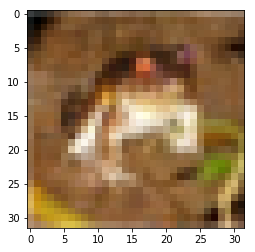

In [10]:
img = trainDset[0][0]
img_gray = img.convert('L')
img_arr = np.array(img_gray)
plt.imshow(img)

## Local Binary Patterns

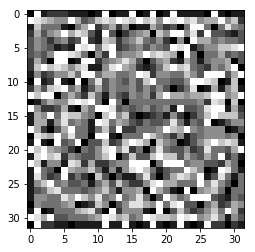

In [13]:
feat_lbp = local_binary_pattern(img_arr,8,1,'uniform')#radius =1,
feat_lbp = np.uint8((feat_lbp/feat_lbp.max())*255) #converting to uint8
lbp_img = PIL.Image.fromarray(feat_lbp)#conversion from array to lbp image
plt.imshow(lbp_img,cmap='gray')

In [14]:
lbp_hist,_ = np.histogram(feat_lbp,8)
lbp_hist = np.array(lbp_hist,dtype = float)
lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
lbp_energy = np.sum(lbp_prob**2)
lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
print('LBP energy :'+str(lbp_energy))
print('LBP entropy :'+str(lbp_entropy))

LBP energy :0.14321517944335938
LBP entropy :2.8958499002961196


## Co-occurance Matrix

In [17]:
gCoMat = greycomatrix(img_arr, [2], [0], 256, symmetric=True,normed = True)
contrast = greycoprops(gCoMat, prop='contrast')
dissimilarity = greycoprops(gCoMat,prop = 'dissimilarity')
homogeneity = greycoprops(gCoMat, prop = 'homogeneity')
energy = greycoprops(gCoMat, prop= 'energy')
correlation = greycoprops(gCoMat, prop = 'correlation')
print('Contrast : '+str(contrast))
print('Dissimilarity : '+str(dissimilarity))
print('homogeneity : '+str(homogeneity))
print('Energy : '+str(energy))
print('Correlation : '+str(correlation))

Contrast : [[1296.01041667]]
Dissimilarity : [[24.225]]
homogeneity : [[0.06263378]]
Energy : [[0.02654718]]
Correlation : [[0.61264604]]


## Gabor filter

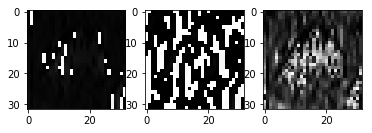

In [18]:
gaborFilter_real , gaborFilter_imag = gabor(img_arr,frequency=0.6)
gaborFilter = (gaborFilter_real**2 + gaborFilter_imag**2)//2

fig,ax = plt.subplots(1,3)
ax[0].imshow(gaborFilter_real,cmap = 'gray')
ax[1].imshow(gaborFilter_imag,cmap = 'gray')
ax[2].imshow(gaborFilter,cmap = 'gray')

In [19]:
gabor_hist,_ = np.histogram(gaborFilter,8)
gabor_hist = np.array(gabor_hist,dtype = float)
gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
gabor_energy = np.sum(gabor_prob**2)
gabor_entropy = -np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))
print('Gabor energy : '+str(gabor_energy))
print('Gabor entropy : '+str(gabor_entropy))

Gabor energy : 0.2469921112060547
Gabor entropy : 2.357696484594805


## Extracting features from the train dataset

In [21]:
label = []
featLength = 2+5+2
trainFeats = np.zeros((len(trainDset),featLength))
for tr in range(len(trainDset)):
    print(str(tr+1) + '/' +str(len(trainDset)))
    img = trainDset[tr][0] #taking one image at a time
    img_gray = img.convert('L') #convert to grayscale
    img_arr = np.array(img_gray.getdata()).reshape(img.size[1],img.size[0])
    
    feat_lbp = local_binary_pattern(img_arr,5,2,'uniform').reshape(img.size[1],img.size[0])
    lbp_hist,_ = np.histogram(feat_lbp,8)
    lbp_hist = np.array(lbp_hist,dtype = float)
    lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
    lnp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
    
    gCoMat = greycomatrix(img_arr, [2], [0] , 256, symmetric=True, normed=True)
    contrast = greycoprops(gCoMat, prop='contrast')
    dissimilarity = greycoprops(gCoMat,prop = 'dissimilarity')
    homogeneity = greycoprops(gCoMat, prop = 'homogeneity')
    energy = greycoprops(gCoMat, prop= 'energy')
    correlation = greycoprops(gCoMat, prop = 'correlation')
    feat_glcm = np.array([contrast[0][0], dissimilarity[0][0], homogeneity[0][0], energy[0][0], correlation[0][0]])
    
    gaborFilter_real , gaborFilter_imag = gabor(img_arr,frequency=0.6)
    gaborFilter = (gaborFilter_real**2 + gaborFilter_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilter,8)
    gabor_hist = np.array(gabor_hist,dtype = float)
    gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
    gabor_energy = np.sum(gabor_prob**2)
    gabor_entropy = -np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))
    
    concat_feat = np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]))
    trainFeats[tr,:] = concat_feat
    
    label.append(trainDset[tr][1])

trainLabel = np.array(label)

1/50000
2/50000
3/50000
4/50000
5/50000
6/50000
7/50000
8/50000
9/50000
10/50000
11/50000
12/50000
13/50000
14/50000
15/50000
16/50000


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log2
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


17/50000
18/50000
19/50000
20/50000
21/50000
22/50000
23/50000
24/50000
25/50000
26/50000
27/50000
28/50000
29/50000
30/50000
31/50000
32/50000
33/50000
34/50000
35/50000
36/50000
37/50000
38/50000
39/50000
40/50000
41/50000
42/50000
43/50000
44/50000
45/50000
46/50000
47/50000
48/50000
49/50000
50/50000
51/50000
52/50000
53/50000
54/50000
55/50000
56/50000
57/50000
58/50000
59/50000
60/50000
61/50000
62/50000
63/50000
64/50000
65/50000
66/50000
67/50000
68/50000
69/50000
70/50000
71/50000
72/50000
73/50000
74/50000
75/50000
76/50000
77/50000
78/50000
79/50000
80/50000
81/50000
82/50000
83/50000
84/50000
85/50000
86/50000
87/50000
88/50000
89/50000
90/50000
91/50000
92/50000
93/50000
94/50000
95/50000
96/50000
97/50000
98/50000
99/50000
100/50000
101/50000
102/50000
103/50000
104/50000
105/50000
106/50000
107/50000
108/50000
109/50000
110/50000
111/50000
112/50000
113/50000
114/50000
115/50000
116/50000
117/50000
118/50000
119/50000
120/50000
121/50000
122/50000
123/50000
124/50000
125

846/50000
847/50000
848/50000
849/50000
850/50000
851/50000
852/50000
853/50000
854/50000
855/50000
856/50000
857/50000
858/50000
859/50000
860/50000
861/50000
862/50000
863/50000
864/50000
865/50000
866/50000
867/50000
868/50000
869/50000
870/50000
871/50000
872/50000
873/50000
874/50000
875/50000
876/50000
877/50000
878/50000
879/50000
880/50000
881/50000
882/50000
883/50000
884/50000
885/50000
886/50000
887/50000
888/50000
889/50000
890/50000
891/50000
892/50000
893/50000
894/50000
895/50000
896/50000
897/50000
898/50000
899/50000
900/50000
901/50000
902/50000
903/50000
904/50000
905/50000
906/50000
907/50000
908/50000
909/50000
910/50000
911/50000
912/50000
913/50000
914/50000
915/50000
916/50000
917/50000
918/50000
919/50000
920/50000
921/50000
922/50000
923/50000
924/50000
925/50000
926/50000
927/50000
928/50000
929/50000
930/50000
931/50000
932/50000
933/50000
934/50000
935/50000
936/50000
937/50000
938/50000
939/50000
940/50000
941/50000
942/50000
943/50000
944/50000
945/50000


1612/50000
1613/50000
1614/50000
1615/50000
1616/50000
1617/50000
1618/50000
1619/50000
1620/50000
1621/50000
1622/50000
1623/50000
1624/50000
1625/50000
1626/50000
1627/50000
1628/50000
1629/50000
1630/50000
1631/50000
1632/50000
1633/50000
1634/50000
1635/50000
1636/50000
1637/50000
1638/50000
1639/50000
1640/50000
1641/50000
1642/50000
1643/50000
1644/50000
1645/50000
1646/50000
1647/50000
1648/50000
1649/50000
1650/50000
1651/50000
1652/50000
1653/50000
1654/50000
1655/50000
1656/50000
1657/50000
1658/50000
1659/50000
1660/50000
1661/50000
1662/50000
1663/50000
1664/50000
1665/50000
1666/50000
1667/50000
1668/50000
1669/50000
1670/50000
1671/50000
1672/50000
1673/50000
1674/50000
1675/50000
1676/50000
1677/50000
1678/50000
1679/50000
1680/50000
1681/50000
1682/50000
1683/50000
1684/50000
1685/50000
1686/50000
1687/50000
1688/50000
1689/50000
1690/50000
1691/50000
1692/50000
1693/50000
1694/50000
1695/50000
1696/50000
1697/50000
1698/50000
1699/50000
1700/50000
1701/50000
1702/50000

2359/50000
2360/50000
2361/50000
2362/50000
2363/50000
2364/50000
2365/50000
2366/50000
2367/50000
2368/50000
2369/50000
2370/50000
2371/50000
2372/50000
2373/50000
2374/50000
2375/50000
2376/50000
2377/50000
2378/50000
2379/50000
2380/50000
2381/50000
2382/50000
2383/50000
2384/50000
2385/50000
2386/50000
2387/50000
2388/50000
2389/50000
2390/50000
2391/50000
2392/50000
2393/50000
2394/50000
2395/50000
2396/50000
2397/50000
2398/50000
2399/50000
2400/50000
2401/50000
2402/50000
2403/50000
2404/50000
2405/50000
2406/50000
2407/50000
2408/50000
2409/50000
2410/50000
2411/50000
2412/50000
2413/50000
2414/50000
2415/50000
2416/50000
2417/50000
2418/50000
2419/50000
2420/50000
2421/50000
2422/50000
2423/50000
2424/50000
2425/50000
2426/50000
2427/50000
2428/50000
2429/50000
2430/50000
2431/50000
2432/50000
2433/50000
2434/50000
2435/50000
2436/50000
2437/50000
2438/50000
2439/50000
2440/50000
2441/50000
2442/50000
2443/50000
2444/50000
2445/50000
2446/50000
2447/50000
2448/50000
2449/50000

3120/50000
3121/50000
3122/50000
3123/50000
3124/50000
3125/50000
3126/50000
3127/50000
3128/50000
3129/50000
3130/50000
3131/50000
3132/50000
3133/50000
3134/50000
3135/50000
3136/50000
3137/50000
3138/50000
3139/50000
3140/50000
3141/50000
3142/50000
3143/50000
3144/50000
3145/50000
3146/50000
3147/50000
3148/50000
3149/50000
3150/50000
3151/50000
3152/50000
3153/50000
3154/50000
3155/50000
3156/50000
3157/50000
3158/50000
3159/50000
3160/50000
3161/50000
3162/50000
3163/50000
3164/50000
3165/50000
3166/50000
3167/50000
3168/50000
3169/50000
3170/50000
3171/50000
3172/50000
3173/50000
3174/50000
3175/50000
3176/50000
3177/50000
3178/50000
3179/50000
3180/50000
3181/50000
3182/50000
3183/50000
3184/50000
3185/50000
3186/50000
3187/50000
3188/50000
3189/50000
3190/50000
3191/50000
3192/50000
3193/50000
3194/50000
3195/50000
3196/50000
3197/50000
3198/50000
3199/50000
3200/50000
3201/50000
3202/50000
3203/50000
3204/50000
3205/50000
3206/50000
3207/50000
3208/50000
3209/50000
3210/50000

3868/50000
3869/50000
3870/50000
3871/50000
3872/50000
3873/50000
3874/50000
3875/50000
3876/50000
3877/50000
3878/50000
3879/50000
3880/50000
3881/50000
3882/50000
3883/50000
3884/50000
3885/50000
3886/50000
3887/50000
3888/50000
3889/50000
3890/50000
3891/50000
3892/50000
3893/50000
3894/50000
3895/50000
3896/50000
3897/50000
3898/50000
3899/50000
3900/50000
3901/50000
3902/50000
3903/50000
3904/50000
3905/50000
3906/50000
3907/50000
3908/50000
3909/50000
3910/50000
3911/50000
3912/50000
3913/50000
3914/50000
3915/50000
3916/50000
3917/50000
3918/50000
3919/50000
3920/50000
3921/50000
3922/50000
3923/50000
3924/50000
3925/50000
3926/50000
3927/50000
3928/50000
3929/50000
3930/50000
3931/50000
3932/50000
3933/50000
3934/50000
3935/50000
3936/50000
3937/50000
3938/50000
3939/50000
3940/50000
3941/50000
3942/50000
3943/50000
3944/50000
3945/50000
3946/50000
3947/50000
3948/50000
3949/50000
3950/50000
3951/50000
3952/50000
3953/50000
3954/50000
3955/50000
3956/50000
3957/50000
3958/50000

4625/50000
4626/50000
4627/50000
4628/50000
4629/50000
4630/50000
4631/50000
4632/50000
4633/50000
4634/50000
4635/50000
4636/50000
4637/50000
4638/50000
4639/50000
4640/50000
4641/50000
4642/50000
4643/50000
4644/50000
4645/50000
4646/50000
4647/50000
4648/50000
4649/50000
4650/50000
4651/50000
4652/50000
4653/50000
4654/50000
4655/50000
4656/50000
4657/50000
4658/50000
4659/50000
4660/50000
4661/50000
4662/50000
4663/50000
4664/50000
4665/50000
4666/50000
4667/50000
4668/50000
4669/50000
4670/50000
4671/50000
4672/50000
4673/50000
4674/50000
4675/50000
4676/50000
4677/50000
4678/50000
4679/50000
4680/50000
4681/50000
4682/50000
4683/50000
4684/50000
4685/50000
4686/50000
4687/50000
4688/50000
4689/50000
4690/50000
4691/50000
4692/50000
4693/50000
4694/50000
4695/50000
4696/50000
4697/50000
4698/50000
4699/50000
4700/50000
4701/50000
4702/50000
4703/50000
4704/50000
4705/50000
4706/50000
4707/50000
4708/50000
4709/50000
4710/50000
4711/50000
4712/50000
4713/50000
4714/50000
4715/50000

5375/50000
5376/50000
5377/50000
5378/50000
5379/50000
5380/50000
5381/50000
5382/50000
5383/50000
5384/50000
5385/50000
5386/50000
5387/50000
5388/50000
5389/50000
5390/50000
5391/50000
5392/50000
5393/50000
5394/50000
5395/50000
5396/50000
5397/50000
5398/50000
5399/50000
5400/50000
5401/50000
5402/50000
5403/50000
5404/50000
5405/50000
5406/50000
5407/50000
5408/50000
5409/50000
5410/50000
5411/50000
5412/50000
5413/50000
5414/50000
5415/50000
5416/50000
5417/50000
5418/50000
5419/50000
5420/50000
5421/50000
5422/50000
5423/50000
5424/50000
5425/50000
5426/50000
5427/50000
5428/50000
5429/50000
5430/50000
5431/50000
5432/50000
5433/50000
5434/50000
5435/50000
5436/50000
5437/50000
5438/50000
5439/50000
5440/50000
5441/50000
5442/50000
5443/50000
5444/50000
5445/50000
5446/50000
5447/50000
5448/50000
5449/50000
5450/50000
5451/50000
5452/50000
5453/50000
5454/50000
5455/50000
5456/50000
5457/50000
5458/50000
5459/50000
5460/50000
5461/50000
5462/50000
5463/50000
5464/50000
5465/50000

6130/50000
6131/50000
6132/50000
6133/50000
6134/50000
6135/50000
6136/50000
6137/50000
6138/50000
6139/50000
6140/50000
6141/50000
6142/50000
6143/50000
6144/50000
6145/50000
6146/50000
6147/50000
6148/50000
6149/50000
6150/50000
6151/50000
6152/50000
6153/50000
6154/50000
6155/50000
6156/50000
6157/50000
6158/50000
6159/50000
6160/50000
6161/50000
6162/50000
6163/50000
6164/50000
6165/50000
6166/50000
6167/50000
6168/50000
6169/50000
6170/50000
6171/50000
6172/50000
6173/50000
6174/50000
6175/50000
6176/50000
6177/50000
6178/50000
6179/50000
6180/50000
6181/50000
6182/50000
6183/50000
6184/50000
6185/50000
6186/50000
6187/50000
6188/50000
6189/50000
6190/50000
6191/50000
6192/50000
6193/50000
6194/50000
6195/50000
6196/50000
6197/50000
6198/50000
6199/50000
6200/50000
6201/50000
6202/50000
6203/50000
6204/50000
6205/50000
6206/50000
6207/50000
6208/50000
6209/50000
6210/50000
6211/50000
6212/50000
6213/50000
6214/50000
6215/50000
6216/50000
6217/50000
6218/50000
6219/50000
6220/50000

6882/50000
6883/50000
6884/50000
6885/50000
6886/50000
6887/50000
6888/50000
6889/50000
6890/50000
6891/50000
6892/50000
6893/50000
6894/50000
6895/50000
6896/50000
6897/50000
6898/50000
6899/50000
6900/50000
6901/50000
6902/50000
6903/50000
6904/50000
6905/50000
6906/50000
6907/50000
6908/50000
6909/50000
6910/50000
6911/50000
6912/50000
6913/50000
6914/50000
6915/50000
6916/50000
6917/50000
6918/50000
6919/50000
6920/50000
6921/50000
6922/50000
6923/50000
6924/50000
6925/50000
6926/50000
6927/50000
6928/50000
6929/50000
6930/50000
6931/50000
6932/50000
6933/50000
6934/50000
6935/50000
6936/50000
6937/50000
6938/50000
6939/50000
6940/50000
6941/50000
6942/50000
6943/50000
6944/50000
6945/50000
6946/50000
6947/50000
6948/50000
6949/50000
6950/50000
6951/50000
6952/50000
6953/50000
6954/50000
6955/50000
6956/50000
6957/50000
6958/50000
6959/50000
6960/50000
6961/50000
6962/50000
6963/50000
6964/50000
6965/50000
6966/50000
6967/50000
6968/50000
6969/50000
6970/50000
6971/50000
6972/50000

7633/50000
7634/50000
7635/50000
7636/50000
7637/50000
7638/50000
7639/50000
7640/50000
7641/50000
7642/50000
7643/50000
7644/50000
7645/50000
7646/50000
7647/50000
7648/50000
7649/50000
7650/50000
7651/50000
7652/50000
7653/50000
7654/50000
7655/50000
7656/50000
7657/50000
7658/50000
7659/50000
7660/50000
7661/50000
7662/50000
7663/50000
7664/50000
7665/50000
7666/50000
7667/50000
7668/50000
7669/50000
7670/50000
7671/50000
7672/50000
7673/50000
7674/50000
7675/50000
7676/50000
7677/50000
7678/50000
7679/50000
7680/50000
7681/50000
7682/50000
7683/50000
7684/50000
7685/50000
7686/50000
7687/50000
7688/50000
7689/50000
7690/50000
7691/50000
7692/50000
7693/50000
7694/50000
7695/50000
7696/50000
7697/50000
7698/50000
7699/50000
7700/50000
7701/50000
7702/50000
7703/50000
7704/50000
7705/50000
7706/50000
7707/50000
7708/50000
7709/50000
7710/50000
7711/50000
7712/50000
7713/50000
7714/50000
7715/50000
7716/50000
7717/50000
7718/50000
7719/50000
7720/50000
7721/50000
7722/50000
7723/50000

8387/50000
8388/50000
8389/50000
8390/50000
8391/50000
8392/50000
8393/50000
8394/50000
8395/50000
8396/50000
8397/50000
8398/50000
8399/50000
8400/50000
8401/50000
8402/50000
8403/50000
8404/50000
8405/50000
8406/50000
8407/50000
8408/50000
8409/50000
8410/50000
8411/50000
8412/50000
8413/50000
8414/50000
8415/50000
8416/50000
8417/50000
8418/50000
8419/50000
8420/50000
8421/50000
8422/50000
8423/50000
8424/50000
8425/50000
8426/50000
8427/50000
8428/50000
8429/50000
8430/50000
8431/50000
8432/50000
8433/50000
8434/50000
8435/50000
8436/50000
8437/50000
8438/50000
8439/50000
8440/50000
8441/50000
8442/50000
8443/50000
8444/50000
8445/50000
8446/50000
8447/50000
8448/50000
8449/50000
8450/50000
8451/50000
8452/50000
8453/50000
8454/50000
8455/50000
8456/50000
8457/50000
8458/50000
8459/50000
8460/50000
8461/50000
8462/50000
8463/50000
8464/50000
8465/50000
8466/50000
8467/50000
8468/50000
8469/50000
8470/50000
8471/50000
8472/50000
8473/50000
8474/50000
8475/50000
8476/50000
8477/50000

9135/50000
9136/50000
9137/50000
9138/50000
9139/50000
9140/50000
9141/50000
9142/50000
9143/50000
9144/50000
9145/50000
9146/50000
9147/50000
9148/50000
9149/50000
9150/50000
9151/50000
9152/50000
9153/50000
9154/50000
9155/50000
9156/50000
9157/50000
9158/50000
9159/50000
9160/50000
9161/50000
9162/50000
9163/50000
9164/50000
9165/50000
9166/50000
9167/50000
9168/50000
9169/50000
9170/50000
9171/50000
9172/50000
9173/50000
9174/50000
9175/50000
9176/50000
9177/50000
9178/50000
9179/50000
9180/50000
9181/50000
9182/50000
9183/50000
9184/50000
9185/50000
9186/50000
9187/50000
9188/50000
9189/50000
9190/50000
9191/50000
9192/50000
9193/50000
9194/50000
9195/50000
9196/50000
9197/50000
9198/50000
9199/50000
9200/50000
9201/50000
9202/50000
9203/50000
9204/50000
9205/50000
9206/50000
9207/50000
9208/50000
9209/50000
9210/50000
9211/50000
9212/50000
9213/50000
9214/50000
9215/50000
9216/50000
9217/50000
9218/50000
9219/50000
9220/50000
9221/50000
9222/50000
9223/50000
9224/50000
9225/50000

9896/50000
9897/50000
9898/50000
9899/50000
9900/50000
9901/50000
9902/50000
9903/50000
9904/50000
9905/50000
9906/50000
9907/50000
9908/50000
9909/50000
9910/50000
9911/50000
9912/50000
9913/50000
9914/50000
9915/50000
9916/50000
9917/50000
9918/50000
9919/50000
9920/50000
9921/50000
9922/50000
9923/50000
9924/50000
9925/50000
9926/50000
9927/50000
9928/50000
9929/50000
9930/50000
9931/50000
9932/50000
9933/50000
9934/50000
9935/50000
9936/50000
9937/50000
9938/50000
9939/50000
9940/50000
9941/50000
9942/50000
9943/50000
9944/50000
9945/50000
9946/50000
9947/50000
9948/50000
9949/50000
9950/50000
9951/50000
9952/50000
9953/50000
9954/50000
9955/50000
9956/50000
9957/50000
9958/50000
9959/50000
9960/50000
9961/50000
9962/50000
9963/50000
9964/50000
9965/50000
9966/50000
9967/50000
9968/50000
9969/50000
9970/50000
9971/50000
9972/50000
9973/50000
9974/50000
9975/50000
9976/50000
9977/50000
9978/50000
9979/50000
9980/50000
9981/50000
9982/50000
9983/50000
9984/50000
9985/50000
9986/50000

10590/50000
10591/50000
10592/50000
10593/50000
10594/50000
10595/50000
10596/50000
10597/50000
10598/50000
10599/50000
10600/50000
10601/50000
10602/50000
10603/50000
10604/50000
10605/50000
10606/50000
10607/50000
10608/50000
10609/50000
10610/50000
10611/50000
10612/50000
10613/50000
10614/50000
10615/50000
10616/50000
10617/50000
10618/50000
10619/50000
10620/50000
10621/50000
10622/50000
10623/50000
10624/50000
10625/50000
10626/50000
10627/50000
10628/50000
10629/50000
10630/50000
10631/50000
10632/50000
10633/50000
10634/50000
10635/50000
10636/50000
10637/50000
10638/50000
10639/50000
10640/50000
10641/50000
10642/50000
10643/50000
10644/50000
10645/50000
10646/50000
10647/50000
10648/50000
10649/50000
10650/50000
10651/50000
10652/50000
10653/50000
10654/50000
10655/50000
10656/50000
10657/50000
10658/50000
10659/50000
10660/50000
10661/50000
10662/50000
10663/50000
10664/50000
10665/50000
10666/50000
10667/50000
10668/50000
10669/50000
10670/50000
10671/50000
10672/50000
1067

11284/50000
11285/50000
11286/50000
11287/50000
11288/50000
11289/50000
11290/50000
11291/50000
11292/50000
11293/50000
11294/50000
11295/50000
11296/50000
11297/50000
11298/50000
11299/50000
11300/50000
11301/50000
11302/50000
11303/50000
11304/50000
11305/50000
11306/50000
11307/50000
11308/50000
11309/50000
11310/50000
11311/50000
11312/50000
11313/50000
11314/50000
11315/50000
11316/50000
11317/50000
11318/50000
11319/50000
11320/50000
11321/50000
11322/50000
11323/50000
11324/50000
11325/50000
11326/50000
11327/50000
11328/50000
11329/50000
11330/50000
11331/50000
11332/50000
11333/50000
11334/50000
11335/50000
11336/50000
11337/50000
11338/50000
11339/50000
11340/50000
11341/50000
11342/50000
11343/50000
11344/50000
11345/50000
11346/50000
11347/50000
11348/50000
11349/50000
11350/50000
11351/50000
11352/50000
11353/50000
11354/50000
11355/50000
11356/50000
11357/50000
11358/50000
11359/50000
11360/50000
11361/50000
11362/50000
11363/50000
11364/50000
11365/50000
11366/50000
1136

11984/50000
11985/50000
11986/50000
11987/50000
11988/50000
11989/50000
11990/50000
11991/50000
11992/50000
11993/50000
11994/50000
11995/50000
11996/50000
11997/50000
11998/50000
11999/50000
12000/50000
12001/50000
12002/50000
12003/50000
12004/50000
12005/50000
12006/50000
12007/50000
12008/50000
12009/50000
12010/50000
12011/50000
12012/50000
12013/50000
12014/50000
12015/50000
12016/50000
12017/50000
12018/50000
12019/50000
12020/50000
12021/50000
12022/50000
12023/50000
12024/50000
12025/50000
12026/50000
12027/50000
12028/50000
12029/50000
12030/50000
12031/50000
12032/50000
12033/50000
12034/50000
12035/50000
12036/50000
12037/50000
12038/50000
12039/50000
12040/50000
12041/50000
12042/50000
12043/50000
12044/50000
12045/50000
12046/50000
12047/50000
12048/50000
12049/50000
12050/50000
12051/50000
12052/50000
12053/50000
12054/50000
12055/50000
12056/50000
12057/50000
12058/50000
12059/50000
12060/50000
12061/50000
12062/50000
12063/50000
12064/50000
12065/50000
12066/50000
1206

12683/50000
12684/50000
12685/50000
12686/50000
12687/50000
12688/50000
12689/50000
12690/50000
12691/50000
12692/50000
12693/50000
12694/50000
12695/50000
12696/50000
12697/50000
12698/50000
12699/50000
12700/50000
12701/50000
12702/50000
12703/50000
12704/50000
12705/50000
12706/50000
12707/50000
12708/50000
12709/50000
12710/50000
12711/50000
12712/50000
12713/50000
12714/50000
12715/50000
12716/50000
12717/50000
12718/50000
12719/50000
12720/50000
12721/50000
12722/50000
12723/50000
12724/50000
12725/50000
12726/50000
12727/50000
12728/50000
12729/50000
12730/50000
12731/50000
12732/50000
12733/50000
12734/50000
12735/50000
12736/50000
12737/50000
12738/50000
12739/50000
12740/50000
12741/50000
12742/50000
12743/50000
12744/50000
12745/50000
12746/50000
12747/50000
12748/50000
12749/50000
12750/50000
12751/50000
12752/50000
12753/50000
12754/50000
12755/50000
12756/50000
12757/50000
12758/50000
12759/50000
12760/50000
12761/50000
12762/50000
12763/50000
12764/50000
12765/50000
1276

13390/50000
13391/50000
13392/50000
13393/50000
13394/50000
13395/50000
13396/50000
13397/50000
13398/50000
13399/50000
13400/50000
13401/50000
13402/50000
13403/50000
13404/50000
13405/50000
13406/50000
13407/50000
13408/50000
13409/50000
13410/50000
13411/50000
13412/50000
13413/50000
13414/50000
13415/50000
13416/50000
13417/50000
13418/50000
13419/50000
13420/50000
13421/50000
13422/50000
13423/50000
13424/50000
13425/50000
13426/50000
13427/50000
13428/50000
13429/50000
13430/50000
13431/50000
13432/50000
13433/50000
13434/50000
13435/50000
13436/50000
13437/50000
13438/50000
13439/50000
13440/50000
13441/50000
13442/50000
13443/50000
13444/50000
13445/50000
13446/50000
13447/50000
13448/50000
13449/50000
13450/50000
13451/50000
13452/50000
13453/50000
13454/50000
13455/50000
13456/50000
13457/50000
13458/50000
13459/50000
13460/50000
13461/50000
13462/50000
13463/50000
13464/50000
13465/50000
13466/50000
13467/50000
13468/50000
13469/50000
13470/50000
13471/50000
13472/50000
1347

14113/50000
14114/50000
14115/50000
14116/50000
14117/50000
14118/50000
14119/50000
14120/50000
14121/50000
14122/50000
14123/50000
14124/50000
14125/50000
14126/50000
14127/50000
14128/50000
14129/50000
14130/50000
14131/50000
14132/50000
14133/50000
14134/50000
14135/50000
14136/50000
14137/50000
14138/50000
14139/50000
14140/50000
14141/50000
14142/50000
14143/50000
14144/50000
14145/50000
14146/50000
14147/50000
14148/50000
14149/50000
14150/50000
14151/50000
14152/50000
14153/50000
14154/50000
14155/50000
14156/50000
14157/50000
14158/50000
14159/50000
14160/50000
14161/50000
14162/50000
14163/50000
14164/50000
14165/50000
14166/50000
14167/50000
14168/50000
14169/50000
14170/50000
14171/50000
14172/50000
14173/50000
14174/50000
14175/50000
14176/50000
14177/50000
14178/50000
14179/50000
14180/50000
14181/50000
14182/50000
14183/50000
14184/50000
14185/50000
14186/50000
14187/50000
14188/50000
14189/50000
14190/50000
14191/50000
14192/50000
14193/50000
14194/50000
14195/50000
1419

14805/50000
14806/50000
14807/50000
14808/50000
14809/50000
14810/50000
14811/50000
14812/50000
14813/50000
14814/50000
14815/50000
14816/50000
14817/50000
14818/50000
14819/50000
14820/50000
14821/50000
14822/50000
14823/50000
14824/50000
14825/50000
14826/50000
14827/50000
14828/50000
14829/50000
14830/50000
14831/50000
14832/50000
14833/50000
14834/50000
14835/50000
14836/50000
14837/50000
14838/50000
14839/50000
14840/50000
14841/50000
14842/50000
14843/50000
14844/50000
14845/50000
14846/50000
14847/50000
14848/50000
14849/50000
14850/50000
14851/50000
14852/50000
14853/50000
14854/50000
14855/50000
14856/50000
14857/50000
14858/50000
14859/50000
14860/50000
14861/50000
14862/50000
14863/50000
14864/50000
14865/50000
14866/50000
14867/50000
14868/50000
14869/50000
14870/50000
14871/50000
14872/50000
14873/50000
14874/50000
14875/50000
14876/50000
14877/50000
14878/50000
14879/50000
14880/50000
14881/50000
14882/50000
14883/50000
14884/50000
14885/50000
14886/50000
14887/50000
1488

15515/50000
15516/50000
15517/50000
15518/50000
15519/50000
15520/50000
15521/50000
15522/50000
15523/50000
15524/50000
15525/50000
15526/50000
15527/50000
15528/50000
15529/50000
15530/50000
15531/50000
15532/50000
15533/50000
15534/50000
15535/50000
15536/50000
15537/50000
15538/50000
15539/50000
15540/50000
15541/50000
15542/50000
15543/50000
15544/50000
15545/50000
15546/50000
15547/50000
15548/50000
15549/50000
15550/50000
15551/50000
15552/50000
15553/50000
15554/50000
15555/50000
15556/50000
15557/50000
15558/50000
15559/50000
15560/50000
15561/50000
15562/50000
15563/50000
15564/50000
15565/50000
15566/50000
15567/50000
15568/50000
15569/50000
15570/50000
15571/50000
15572/50000
15573/50000
15574/50000
15575/50000
15576/50000
15577/50000
15578/50000
15579/50000
15580/50000
15581/50000
15582/50000
15583/50000
15584/50000
15585/50000
15586/50000
15587/50000
15588/50000
15589/50000
15590/50000
15591/50000
15592/50000
15593/50000
15594/50000
15595/50000
15596/50000
15597/50000
1559

16228/50000
16229/50000
16230/50000
16231/50000
16232/50000
16233/50000
16234/50000
16235/50000
16236/50000
16237/50000
16238/50000
16239/50000
16240/50000
16241/50000
16242/50000
16243/50000
16244/50000
16245/50000
16246/50000
16247/50000
16248/50000
16249/50000
16250/50000
16251/50000
16252/50000
16253/50000
16254/50000
16255/50000
16256/50000
16257/50000
16258/50000
16259/50000
16260/50000
16261/50000
16262/50000
16263/50000
16264/50000
16265/50000
16266/50000
16267/50000
16268/50000
16269/50000
16270/50000
16271/50000
16272/50000
16273/50000
16274/50000
16275/50000
16276/50000
16277/50000
16278/50000
16279/50000
16280/50000
16281/50000
16282/50000
16283/50000
16284/50000
16285/50000
16286/50000
16287/50000
16288/50000
16289/50000
16290/50000
16291/50000
16292/50000
16293/50000
16294/50000
16295/50000
16296/50000
16297/50000
16298/50000
16299/50000
16300/50000
16301/50000
16302/50000
16303/50000
16304/50000
16305/50000
16306/50000
16307/50000
16308/50000
16309/50000
16310/50000
1631

16911/50000
16912/50000
16913/50000
16914/50000
16915/50000
16916/50000
16917/50000
16918/50000
16919/50000
16920/50000
16921/50000
16922/50000
16923/50000
16924/50000
16925/50000
16926/50000
16927/50000
16928/50000
16929/50000
16930/50000
16931/50000
16932/50000
16933/50000
16934/50000
16935/50000
16936/50000
16937/50000
16938/50000
16939/50000
16940/50000
16941/50000
16942/50000
16943/50000
16944/50000
16945/50000
16946/50000
16947/50000
16948/50000
16949/50000
16950/50000
16951/50000
16952/50000
16953/50000
16954/50000
16955/50000
16956/50000
16957/50000
16958/50000
16959/50000
16960/50000
16961/50000
16962/50000
16963/50000
16964/50000
16965/50000
16966/50000
16967/50000
16968/50000
16969/50000
16970/50000
16971/50000
16972/50000
16973/50000
16974/50000
16975/50000
16976/50000
16977/50000
16978/50000
16979/50000
16980/50000
16981/50000
16982/50000
16983/50000
16984/50000
16985/50000
16986/50000
16987/50000
16988/50000
16989/50000
16990/50000
16991/50000
16992/50000
16993/50000
1699

17601/50000
17602/50000
17603/50000
17604/50000
17605/50000
17606/50000
17607/50000
17608/50000
17609/50000
17610/50000
17611/50000
17612/50000
17613/50000
17614/50000
17615/50000
17616/50000
17617/50000
17618/50000
17619/50000
17620/50000
17621/50000
17622/50000
17623/50000
17624/50000
17625/50000
17626/50000
17627/50000
17628/50000
17629/50000
17630/50000
17631/50000
17632/50000
17633/50000
17634/50000
17635/50000
17636/50000
17637/50000
17638/50000
17639/50000
17640/50000
17641/50000
17642/50000
17643/50000
17644/50000
17645/50000
17646/50000
17647/50000
17648/50000
17649/50000
17650/50000
17651/50000
17652/50000
17653/50000
17654/50000
17655/50000
17656/50000
17657/50000
17658/50000
17659/50000
17660/50000
17661/50000
17662/50000
17663/50000
17664/50000
17665/50000
17666/50000
17667/50000
17668/50000
17669/50000
17670/50000
17671/50000
17672/50000
17673/50000
17674/50000
17675/50000
17676/50000
17677/50000
17678/50000
17679/50000
17680/50000
17681/50000
17682/50000
17683/50000
1768

18309/50000
18310/50000
18311/50000
18312/50000
18313/50000
18314/50000
18315/50000
18316/50000
18317/50000
18318/50000
18319/50000
18320/50000
18321/50000
18322/50000
18323/50000
18324/50000
18325/50000
18326/50000
18327/50000
18328/50000
18329/50000
18330/50000
18331/50000
18332/50000
18333/50000
18334/50000
18335/50000
18336/50000
18337/50000
18338/50000
18339/50000
18340/50000
18341/50000
18342/50000
18343/50000
18344/50000
18345/50000
18346/50000
18347/50000
18348/50000
18349/50000
18350/50000
18351/50000
18352/50000
18353/50000
18354/50000
18355/50000
18356/50000
18357/50000
18358/50000
18359/50000
18360/50000
18361/50000
18362/50000
18363/50000
18364/50000
18365/50000
18366/50000
18367/50000
18368/50000
18369/50000
18370/50000
18371/50000
18372/50000
18373/50000
18374/50000
18375/50000
18376/50000
18377/50000
18378/50000
18379/50000
18380/50000
18381/50000
18382/50000
18383/50000
18384/50000
18385/50000
18386/50000
18387/50000
18388/50000
18389/50000
18390/50000
18391/50000
1839

19013/50000
19014/50000
19015/50000
19016/50000
19017/50000
19018/50000
19019/50000
19020/50000
19021/50000
19022/50000
19023/50000
19024/50000
19025/50000
19026/50000
19027/50000
19028/50000
19029/50000
19030/50000
19031/50000
19032/50000
19033/50000
19034/50000
19035/50000
19036/50000
19037/50000
19038/50000
19039/50000
19040/50000
19041/50000
19042/50000
19043/50000
19044/50000
19045/50000
19046/50000
19047/50000
19048/50000
19049/50000
19050/50000
19051/50000
19052/50000
19053/50000
19054/50000
19055/50000
19056/50000
19057/50000
19058/50000
19059/50000
19060/50000
19061/50000
19062/50000
19063/50000
19064/50000
19065/50000
19066/50000
19067/50000
19068/50000
19069/50000
19070/50000
19071/50000
19072/50000
19073/50000
19074/50000
19075/50000
19076/50000
19077/50000
19078/50000
19079/50000
19080/50000
19081/50000
19082/50000
19083/50000
19084/50000
19085/50000
19086/50000
19087/50000
19088/50000
19089/50000
19090/50000
19091/50000
19092/50000
19093/50000
19094/50000
19095/50000
1909

19708/50000
19709/50000
19710/50000
19711/50000
19712/50000
19713/50000
19714/50000
19715/50000
19716/50000
19717/50000
19718/50000
19719/50000
19720/50000
19721/50000
19722/50000
19723/50000
19724/50000
19725/50000
19726/50000
19727/50000
19728/50000
19729/50000
19730/50000
19731/50000
19732/50000
19733/50000
19734/50000
19735/50000
19736/50000
19737/50000
19738/50000
19739/50000
19740/50000
19741/50000
19742/50000
19743/50000
19744/50000
19745/50000
19746/50000
19747/50000
19748/50000
19749/50000
19750/50000
19751/50000
19752/50000
19753/50000
19754/50000
19755/50000
19756/50000
19757/50000
19758/50000
19759/50000
19760/50000
19761/50000
19762/50000
19763/50000
19764/50000
19765/50000
19766/50000
19767/50000
19768/50000
19769/50000
19770/50000
19771/50000
19772/50000
19773/50000
19774/50000
19775/50000
19776/50000
19777/50000
19778/50000
19779/50000
19780/50000
19781/50000
19782/50000
19783/50000
19784/50000
19785/50000
19786/50000
19787/50000
19788/50000
19789/50000
19790/50000
1979

20406/50000
20407/50000
20408/50000
20409/50000
20410/50000
20411/50000
20412/50000
20413/50000
20414/50000
20415/50000
20416/50000
20417/50000
20418/50000
20419/50000
20420/50000
20421/50000
20422/50000
20423/50000
20424/50000
20425/50000
20426/50000
20427/50000
20428/50000
20429/50000
20430/50000
20431/50000
20432/50000
20433/50000
20434/50000
20435/50000
20436/50000
20437/50000
20438/50000
20439/50000
20440/50000
20441/50000
20442/50000
20443/50000
20444/50000
20445/50000
20446/50000
20447/50000
20448/50000
20449/50000
20450/50000
20451/50000
20452/50000
20453/50000
20454/50000
20455/50000
20456/50000
20457/50000
20458/50000
20459/50000
20460/50000
20461/50000
20462/50000
20463/50000
20464/50000
20465/50000
20466/50000
20467/50000
20468/50000
20469/50000
20470/50000
20471/50000
20472/50000
20473/50000
20474/50000
20475/50000
20476/50000
20477/50000
20478/50000
20479/50000
20480/50000
20481/50000
20482/50000
20483/50000
20484/50000
20485/50000
20486/50000
20487/50000
20488/50000
2048

21110/50000
21111/50000
21112/50000
21113/50000
21114/50000
21115/50000
21116/50000
21117/50000
21118/50000
21119/50000
21120/50000
21121/50000
21122/50000
21123/50000
21124/50000
21125/50000
21126/50000
21127/50000
21128/50000
21129/50000
21130/50000
21131/50000
21132/50000
21133/50000
21134/50000
21135/50000
21136/50000
21137/50000
21138/50000
21139/50000
21140/50000
21141/50000
21142/50000
21143/50000
21144/50000
21145/50000
21146/50000
21147/50000
21148/50000
21149/50000
21150/50000
21151/50000
21152/50000
21153/50000
21154/50000
21155/50000
21156/50000
21157/50000
21158/50000
21159/50000
21160/50000
21161/50000
21162/50000
21163/50000
21164/50000
21165/50000
21166/50000
21167/50000
21168/50000
21169/50000
21170/50000
21171/50000
21172/50000
21173/50000
21174/50000
21175/50000
21176/50000
21177/50000
21178/50000
21179/50000
21180/50000
21181/50000
21182/50000
21183/50000
21184/50000
21185/50000
21186/50000
21187/50000
21188/50000
21189/50000
21190/50000
21191/50000
21192/50000
2119

21817/50000
21818/50000
21819/50000
21820/50000
21821/50000
21822/50000
21823/50000
21824/50000
21825/50000
21826/50000
21827/50000
21828/50000
21829/50000
21830/50000
21831/50000
21832/50000
21833/50000
21834/50000
21835/50000
21836/50000
21837/50000
21838/50000
21839/50000
21840/50000
21841/50000
21842/50000
21843/50000
21844/50000
21845/50000
21846/50000
21847/50000
21848/50000
21849/50000
21850/50000
21851/50000
21852/50000
21853/50000
21854/50000
21855/50000
21856/50000
21857/50000
21858/50000
21859/50000
21860/50000
21861/50000
21862/50000
21863/50000
21864/50000
21865/50000
21866/50000
21867/50000
21868/50000
21869/50000
21870/50000
21871/50000
21872/50000
21873/50000
21874/50000
21875/50000
21876/50000
21877/50000
21878/50000
21879/50000
21880/50000
21881/50000
21882/50000
21883/50000
21884/50000
21885/50000
21886/50000
21887/50000
21888/50000
21889/50000
21890/50000
21891/50000
21892/50000
21893/50000
21894/50000
21895/50000
21896/50000
21897/50000
21898/50000
21899/50000
2190

22517/50000
22518/50000
22519/50000
22520/50000
22521/50000
22522/50000
22523/50000
22524/50000
22525/50000
22526/50000
22527/50000
22528/50000
22529/50000
22530/50000
22531/50000
22532/50000
22533/50000
22534/50000
22535/50000
22536/50000
22537/50000
22538/50000
22539/50000
22540/50000
22541/50000
22542/50000
22543/50000
22544/50000
22545/50000
22546/50000
22547/50000
22548/50000
22549/50000
22550/50000
22551/50000
22552/50000
22553/50000
22554/50000
22555/50000
22556/50000
22557/50000
22558/50000
22559/50000
22560/50000
22561/50000
22562/50000
22563/50000
22564/50000
22565/50000
22566/50000
22567/50000
22568/50000
22569/50000
22570/50000
22571/50000
22572/50000
22573/50000
22574/50000
22575/50000
22576/50000
22577/50000
22578/50000
22579/50000
22580/50000
22581/50000
22582/50000
22583/50000
22584/50000
22585/50000
22586/50000
22587/50000
22588/50000
22589/50000
22590/50000
22591/50000
22592/50000
22593/50000
22594/50000
22595/50000
22596/50000
22597/50000
22598/50000
22599/50000
2260

23231/50000
23232/50000
23233/50000
23234/50000
23235/50000
23236/50000
23237/50000
23238/50000
23239/50000
23240/50000
23241/50000
23242/50000
23243/50000
23244/50000
23245/50000
23246/50000
23247/50000
23248/50000
23249/50000
23250/50000
23251/50000
23252/50000
23253/50000
23254/50000
23255/50000
23256/50000
23257/50000
23258/50000
23259/50000
23260/50000
23261/50000
23262/50000
23263/50000
23264/50000
23265/50000
23266/50000
23267/50000
23268/50000
23269/50000
23270/50000
23271/50000
23272/50000
23273/50000
23274/50000
23275/50000
23276/50000
23277/50000
23278/50000
23279/50000
23280/50000
23281/50000
23282/50000
23283/50000
23284/50000
23285/50000
23286/50000
23287/50000
23288/50000
23289/50000
23290/50000
23291/50000
23292/50000
23293/50000
23294/50000
23295/50000
23296/50000
23297/50000
23298/50000
23299/50000
23300/50000
23301/50000
23302/50000
23303/50000
23304/50000
23305/50000
23306/50000
23307/50000
23308/50000
23309/50000
23310/50000
23311/50000
23312/50000
23313/50000
2331

23939/50000
23940/50000
23941/50000
23942/50000
23943/50000
23944/50000
23945/50000
23946/50000
23947/50000
23948/50000
23949/50000
23950/50000
23951/50000
23952/50000
23953/50000
23954/50000
23955/50000
23956/50000
23957/50000
23958/50000
23959/50000
23960/50000
23961/50000
23962/50000
23963/50000
23964/50000
23965/50000
23966/50000
23967/50000
23968/50000
23969/50000
23970/50000
23971/50000
23972/50000
23973/50000
23974/50000
23975/50000
23976/50000
23977/50000
23978/50000
23979/50000
23980/50000
23981/50000
23982/50000
23983/50000
23984/50000
23985/50000
23986/50000
23987/50000
23988/50000
23989/50000
23990/50000
23991/50000
23992/50000
23993/50000
23994/50000
23995/50000
23996/50000
23997/50000
23998/50000
23999/50000
24000/50000
24001/50000
24002/50000
24003/50000
24004/50000
24005/50000
24006/50000
24007/50000
24008/50000
24009/50000
24010/50000
24011/50000
24012/50000
24013/50000
24014/50000
24015/50000
24016/50000
24017/50000
24018/50000
24019/50000
24020/50000
24021/50000
2402

24638/50000
24639/50000
24640/50000
24641/50000
24642/50000
24643/50000
24644/50000
24645/50000
24646/50000
24647/50000
24648/50000
24649/50000
24650/50000
24651/50000
24652/50000
24653/50000
24654/50000
24655/50000
24656/50000
24657/50000
24658/50000
24659/50000
24660/50000
24661/50000
24662/50000
24663/50000
24664/50000
24665/50000
24666/50000
24667/50000
24668/50000
24669/50000
24670/50000
24671/50000
24672/50000
24673/50000
24674/50000
24675/50000
24676/50000
24677/50000
24678/50000
24679/50000
24680/50000
24681/50000
24682/50000
24683/50000
24684/50000
24685/50000
24686/50000
24687/50000
24688/50000
24689/50000
24690/50000
24691/50000
24692/50000
24693/50000
24694/50000
24695/50000
24696/50000
24697/50000
24698/50000
24699/50000
24700/50000
24701/50000
24702/50000
24703/50000
24704/50000
24705/50000
24706/50000
24707/50000
24708/50000
24709/50000
24710/50000
24711/50000
24712/50000
24713/50000
24714/50000
24715/50000
24716/50000
24717/50000
24718/50000
24719/50000
24720/50000
2472

25347/50000
25348/50000
25349/50000
25350/50000
25351/50000
25352/50000
25353/50000
25354/50000
25355/50000
25356/50000
25357/50000
25358/50000
25359/50000
25360/50000
25361/50000
25362/50000
25363/50000
25364/50000
25365/50000
25366/50000
25367/50000
25368/50000
25369/50000
25370/50000
25371/50000
25372/50000
25373/50000
25374/50000
25375/50000
25376/50000
25377/50000
25378/50000
25379/50000
25380/50000
25381/50000
25382/50000
25383/50000
25384/50000
25385/50000
25386/50000
25387/50000
25388/50000
25389/50000
25390/50000
25391/50000
25392/50000
25393/50000
25394/50000
25395/50000
25396/50000
25397/50000
25398/50000
25399/50000
25400/50000
25401/50000
25402/50000
25403/50000
25404/50000
25405/50000
25406/50000
25407/50000
25408/50000
25409/50000
25410/50000
25411/50000
25412/50000
25413/50000
25414/50000
25415/50000
25416/50000
25417/50000
25418/50000
25419/50000
25420/50000
25421/50000
25422/50000
25423/50000
25424/50000
25425/50000
25426/50000
25427/50000
25428/50000
25429/50000
2543

26052/50000
26053/50000
26054/50000
26055/50000
26056/50000
26057/50000
26058/50000
26059/50000
26060/50000
26061/50000
26062/50000
26063/50000
26064/50000
26065/50000
26066/50000
26067/50000
26068/50000
26069/50000
26070/50000
26071/50000
26072/50000
26073/50000
26074/50000
26075/50000
26076/50000
26077/50000
26078/50000
26079/50000
26080/50000
26081/50000
26082/50000
26083/50000
26084/50000
26085/50000
26086/50000
26087/50000
26088/50000
26089/50000
26090/50000
26091/50000
26092/50000
26093/50000
26094/50000
26095/50000
26096/50000
26097/50000
26098/50000
26099/50000
26100/50000
26101/50000
26102/50000
26103/50000
26104/50000
26105/50000
26106/50000
26107/50000
26108/50000
26109/50000
26110/50000
26111/50000
26112/50000
26113/50000
26114/50000
26115/50000
26116/50000
26117/50000
26118/50000
26119/50000
26120/50000
26121/50000
26122/50000
26123/50000
26124/50000
26125/50000
26126/50000
26127/50000
26128/50000
26129/50000
26130/50000
26131/50000
26132/50000
26133/50000
26134/50000
2613

26740/50000
26741/50000
26742/50000
26743/50000
26744/50000
26745/50000
26746/50000
26747/50000
26748/50000
26749/50000
26750/50000
26751/50000
26752/50000
26753/50000
26754/50000
26755/50000
26756/50000
26757/50000
26758/50000
26759/50000
26760/50000
26761/50000
26762/50000
26763/50000
26764/50000
26765/50000
26766/50000
26767/50000
26768/50000
26769/50000
26770/50000
26771/50000
26772/50000
26773/50000
26774/50000
26775/50000
26776/50000
26777/50000
26778/50000
26779/50000
26780/50000
26781/50000
26782/50000
26783/50000
26784/50000
26785/50000
26786/50000
26787/50000
26788/50000
26789/50000
26790/50000
26791/50000
26792/50000
26793/50000
26794/50000
26795/50000
26796/50000
26797/50000
26798/50000
26799/50000
26800/50000
26801/50000
26802/50000
26803/50000
26804/50000
26805/50000
26806/50000
26807/50000
26808/50000
26809/50000
26810/50000
26811/50000
26812/50000
26813/50000
26814/50000
26815/50000
26816/50000
26817/50000
26818/50000
26819/50000
26820/50000
26821/50000
26822/50000
2682

27441/50000
27442/50000
27443/50000
27444/50000
27445/50000
27446/50000
27447/50000
27448/50000
27449/50000
27450/50000
27451/50000
27452/50000
27453/50000
27454/50000
27455/50000
27456/50000
27457/50000
27458/50000
27459/50000
27460/50000
27461/50000
27462/50000
27463/50000
27464/50000
27465/50000
27466/50000
27467/50000
27468/50000
27469/50000
27470/50000
27471/50000
27472/50000
27473/50000
27474/50000
27475/50000
27476/50000
27477/50000
27478/50000
27479/50000
27480/50000
27481/50000
27482/50000
27483/50000
27484/50000
27485/50000
27486/50000
27487/50000
27488/50000
27489/50000
27490/50000
27491/50000
27492/50000
27493/50000
27494/50000
27495/50000
27496/50000
27497/50000
27498/50000
27499/50000
27500/50000
27501/50000
27502/50000
27503/50000
27504/50000
27505/50000
27506/50000
27507/50000
27508/50000
27509/50000
27510/50000
27511/50000
27512/50000
27513/50000
27514/50000
27515/50000
27516/50000
27517/50000
27518/50000
27519/50000
27520/50000
27521/50000
27522/50000
27523/50000
2752

28133/50000
28134/50000
28135/50000
28136/50000
28137/50000
28138/50000
28139/50000
28140/50000
28141/50000
28142/50000
28143/50000
28144/50000
28145/50000
28146/50000
28147/50000
28148/50000
28149/50000
28150/50000
28151/50000
28152/50000
28153/50000
28154/50000
28155/50000
28156/50000
28157/50000
28158/50000
28159/50000
28160/50000
28161/50000
28162/50000
28163/50000
28164/50000
28165/50000
28166/50000
28167/50000
28168/50000
28169/50000
28170/50000
28171/50000
28172/50000
28173/50000
28174/50000
28175/50000
28176/50000
28177/50000
28178/50000
28179/50000
28180/50000
28181/50000
28182/50000
28183/50000
28184/50000
28185/50000
28186/50000
28187/50000
28188/50000
28189/50000
28190/50000
28191/50000
28192/50000
28193/50000
28194/50000
28195/50000
28196/50000
28197/50000
28198/50000
28199/50000
28200/50000
28201/50000
28202/50000
28203/50000
28204/50000
28205/50000
28206/50000
28207/50000
28208/50000
28209/50000
28210/50000
28211/50000
28212/50000
28213/50000
28214/50000
28215/50000
2821

28832/50000
28833/50000
28834/50000
28835/50000
28836/50000
28837/50000
28838/50000
28839/50000
28840/50000
28841/50000
28842/50000
28843/50000
28844/50000
28845/50000
28846/50000
28847/50000
28848/50000
28849/50000
28850/50000
28851/50000
28852/50000
28853/50000
28854/50000
28855/50000
28856/50000
28857/50000
28858/50000
28859/50000
28860/50000
28861/50000
28862/50000
28863/50000
28864/50000
28865/50000
28866/50000
28867/50000
28868/50000
28869/50000
28870/50000
28871/50000
28872/50000
28873/50000
28874/50000
28875/50000
28876/50000
28877/50000
28878/50000
28879/50000
28880/50000
28881/50000
28882/50000
28883/50000
28884/50000
28885/50000
28886/50000
28887/50000
28888/50000
28889/50000
28890/50000
28891/50000
28892/50000
28893/50000
28894/50000
28895/50000
28896/50000
28897/50000
28898/50000
28899/50000
28900/50000
28901/50000
28902/50000
28903/50000
28904/50000
28905/50000
28906/50000
28907/50000
28908/50000
28909/50000
28910/50000
28911/50000
28912/50000
28913/50000
28914/50000
2891

29534/50000
29535/50000
29536/50000
29537/50000
29538/50000
29539/50000
29540/50000
29541/50000
29542/50000
29543/50000
29544/50000
29545/50000
29546/50000
29547/50000
29548/50000
29549/50000
29550/50000
29551/50000
29552/50000
29553/50000
29554/50000
29555/50000
29556/50000
29557/50000
29558/50000
29559/50000
29560/50000
29561/50000
29562/50000
29563/50000
29564/50000
29565/50000
29566/50000
29567/50000
29568/50000
29569/50000
29570/50000
29571/50000
29572/50000
29573/50000
29574/50000
29575/50000
29576/50000
29577/50000
29578/50000
29579/50000
29580/50000
29581/50000
29582/50000
29583/50000
29584/50000
29585/50000
29586/50000
29587/50000
29588/50000
29589/50000
29590/50000
29591/50000
29592/50000
29593/50000
29594/50000
29595/50000
29596/50000
29597/50000
29598/50000
29599/50000
29600/50000
29601/50000
29602/50000
29603/50000
29604/50000
29605/50000
29606/50000
29607/50000
29608/50000
29609/50000
29610/50000
29611/50000
29612/50000
29613/50000
29614/50000
29615/50000
29616/50000
2961

30232/50000
30233/50000
30234/50000
30235/50000
30236/50000
30237/50000
30238/50000
30239/50000
30240/50000
30241/50000
30242/50000
30243/50000
30244/50000
30245/50000
30246/50000
30247/50000
30248/50000
30249/50000
30250/50000
30251/50000
30252/50000
30253/50000
30254/50000
30255/50000
30256/50000
30257/50000
30258/50000
30259/50000
30260/50000
30261/50000
30262/50000
30263/50000
30264/50000
30265/50000
30266/50000
30267/50000
30268/50000
30269/50000
30270/50000
30271/50000
30272/50000
30273/50000
30274/50000
30275/50000
30276/50000
30277/50000
30278/50000
30279/50000
30280/50000
30281/50000
30282/50000
30283/50000
30284/50000
30285/50000
30286/50000
30287/50000
30288/50000
30289/50000
30290/50000
30291/50000
30292/50000
30293/50000
30294/50000
30295/50000
30296/50000
30297/50000
30298/50000
30299/50000
30300/50000
30301/50000
30302/50000
30303/50000
30304/50000
30305/50000
30306/50000
30307/50000
30308/50000
30309/50000
30310/50000
30311/50000
30312/50000
30313/50000
30314/50000
3031

30928/50000
30929/50000
30930/50000
30931/50000
30932/50000
30933/50000
30934/50000
30935/50000
30936/50000
30937/50000
30938/50000
30939/50000
30940/50000
30941/50000
30942/50000
30943/50000
30944/50000
30945/50000
30946/50000
30947/50000
30948/50000
30949/50000
30950/50000
30951/50000
30952/50000
30953/50000
30954/50000
30955/50000
30956/50000
30957/50000
30958/50000
30959/50000
30960/50000
30961/50000
30962/50000
30963/50000
30964/50000
30965/50000
30966/50000
30967/50000
30968/50000
30969/50000
30970/50000
30971/50000
30972/50000
30973/50000
30974/50000
30975/50000
30976/50000
30977/50000
30978/50000
30979/50000
30980/50000
30981/50000
30982/50000
30983/50000
30984/50000
30985/50000
30986/50000
30987/50000
30988/50000
30989/50000
30990/50000
30991/50000
30992/50000
30993/50000
30994/50000
30995/50000
30996/50000
30997/50000
30998/50000
30999/50000
31000/50000
31001/50000
31002/50000
31003/50000
31004/50000
31005/50000
31006/50000
31007/50000
31008/50000
31009/50000
31010/50000
3101

31621/50000
31622/50000
31623/50000
31624/50000
31625/50000
31626/50000
31627/50000
31628/50000
31629/50000
31630/50000
31631/50000
31632/50000
31633/50000
31634/50000
31635/50000
31636/50000
31637/50000
31638/50000
31639/50000
31640/50000
31641/50000
31642/50000
31643/50000
31644/50000
31645/50000
31646/50000
31647/50000
31648/50000
31649/50000
31650/50000
31651/50000
31652/50000
31653/50000
31654/50000
31655/50000
31656/50000
31657/50000
31658/50000
31659/50000
31660/50000
31661/50000
31662/50000
31663/50000
31664/50000
31665/50000
31666/50000
31667/50000
31668/50000
31669/50000
31670/50000
31671/50000
31672/50000
31673/50000
31674/50000
31675/50000
31676/50000
31677/50000
31678/50000
31679/50000
31680/50000
31681/50000
31682/50000
31683/50000
31684/50000
31685/50000
31686/50000
31687/50000
31688/50000
31689/50000
31690/50000
31691/50000
31692/50000
31693/50000
31694/50000
31695/50000
31696/50000
31697/50000
31698/50000
31699/50000
31700/50000
31701/50000
31702/50000
31703/50000
3170

32315/50000
32316/50000
32317/50000
32318/50000
32319/50000
32320/50000
32321/50000
32322/50000
32323/50000
32324/50000
32325/50000
32326/50000
32327/50000
32328/50000
32329/50000
32330/50000
32331/50000
32332/50000
32333/50000
32334/50000
32335/50000
32336/50000
32337/50000
32338/50000
32339/50000
32340/50000
32341/50000
32342/50000
32343/50000
32344/50000
32345/50000
32346/50000
32347/50000
32348/50000
32349/50000
32350/50000
32351/50000
32352/50000
32353/50000
32354/50000
32355/50000
32356/50000
32357/50000
32358/50000
32359/50000
32360/50000
32361/50000
32362/50000
32363/50000
32364/50000
32365/50000
32366/50000
32367/50000
32368/50000
32369/50000
32370/50000
32371/50000
32372/50000
32373/50000
32374/50000
32375/50000
32376/50000
32377/50000
32378/50000
32379/50000
32380/50000
32381/50000
32382/50000
32383/50000
32384/50000
32385/50000
32386/50000
32387/50000
32388/50000
32389/50000
32390/50000
32391/50000
32392/50000
32393/50000
32394/50000
32395/50000
32396/50000
32397/50000
3239

33006/50000
33007/50000
33008/50000
33009/50000
33010/50000
33011/50000
33012/50000
33013/50000
33014/50000
33015/50000
33016/50000
33017/50000
33018/50000
33019/50000
33020/50000
33021/50000
33022/50000
33023/50000
33024/50000
33025/50000
33026/50000
33027/50000
33028/50000
33029/50000
33030/50000
33031/50000
33032/50000
33033/50000
33034/50000
33035/50000
33036/50000
33037/50000
33038/50000
33039/50000
33040/50000
33041/50000
33042/50000
33043/50000
33044/50000
33045/50000
33046/50000
33047/50000
33048/50000
33049/50000
33050/50000
33051/50000
33052/50000
33053/50000
33054/50000
33055/50000
33056/50000
33057/50000
33058/50000
33059/50000
33060/50000
33061/50000
33062/50000
33063/50000
33064/50000
33065/50000
33066/50000
33067/50000
33068/50000
33069/50000
33070/50000
33071/50000
33072/50000
33073/50000
33074/50000
33075/50000
33076/50000
33077/50000
33078/50000
33079/50000
33080/50000
33081/50000
33082/50000
33083/50000
33084/50000
33085/50000
33086/50000
33087/50000
33088/50000
3308

33717/50000
33718/50000
33719/50000
33720/50000
33721/50000
33722/50000
33723/50000
33724/50000
33725/50000
33726/50000
33727/50000
33728/50000
33729/50000
33730/50000
33731/50000
33732/50000
33733/50000
33734/50000
33735/50000
33736/50000
33737/50000
33738/50000
33739/50000
33740/50000
33741/50000
33742/50000
33743/50000
33744/50000
33745/50000
33746/50000
33747/50000
33748/50000
33749/50000
33750/50000
33751/50000
33752/50000
33753/50000
33754/50000
33755/50000
33756/50000
33757/50000
33758/50000
33759/50000
33760/50000
33761/50000
33762/50000
33763/50000
33764/50000
33765/50000
33766/50000
33767/50000
33768/50000
33769/50000
33770/50000
33771/50000
33772/50000
33773/50000
33774/50000
33775/50000
33776/50000
33777/50000
33778/50000
33779/50000
33780/50000
33781/50000
33782/50000
33783/50000
33784/50000
33785/50000
33786/50000
33787/50000
33788/50000
33789/50000
33790/50000
33791/50000
33792/50000
33793/50000
33794/50000
33795/50000
33796/50000
33797/50000
33798/50000
33799/50000
3380

34416/50000
34417/50000
34418/50000
34419/50000
34420/50000
34421/50000
34422/50000
34423/50000
34424/50000
34425/50000
34426/50000
34427/50000
34428/50000
34429/50000
34430/50000
34431/50000
34432/50000
34433/50000
34434/50000
34435/50000
34436/50000
34437/50000
34438/50000
34439/50000
34440/50000
34441/50000
34442/50000
34443/50000
34444/50000
34445/50000
34446/50000
34447/50000
34448/50000
34449/50000
34450/50000
34451/50000
34452/50000
34453/50000
34454/50000
34455/50000
34456/50000
34457/50000
34458/50000
34459/50000
34460/50000
34461/50000
34462/50000
34463/50000
34464/50000
34465/50000
34466/50000
34467/50000
34468/50000
34469/50000
34470/50000
34471/50000
34472/50000
34473/50000
34474/50000
34475/50000
34476/50000
34477/50000
34478/50000
34479/50000
34480/50000
34481/50000
34482/50000
34483/50000
34484/50000
34485/50000
34486/50000
34487/50000
34488/50000
34489/50000
34490/50000
34491/50000
34492/50000
34493/50000
34494/50000
34495/50000
34496/50000
34497/50000
34498/50000
3449

35122/50000
35123/50000
35124/50000
35125/50000
35126/50000
35127/50000
35128/50000
35129/50000
35130/50000
35131/50000
35132/50000
35133/50000
35134/50000
35135/50000
35136/50000
35137/50000
35138/50000
35139/50000
35140/50000
35141/50000
35142/50000
35143/50000
35144/50000
35145/50000
35146/50000
35147/50000
35148/50000
35149/50000
35150/50000
35151/50000
35152/50000
35153/50000
35154/50000
35155/50000
35156/50000
35157/50000
35158/50000
35159/50000
35160/50000
35161/50000
35162/50000
35163/50000
35164/50000
35165/50000
35166/50000
35167/50000
35168/50000
35169/50000
35170/50000
35171/50000
35172/50000
35173/50000
35174/50000
35175/50000
35176/50000
35177/50000
35178/50000
35179/50000
35180/50000
35181/50000
35182/50000
35183/50000
35184/50000
35185/50000
35186/50000
35187/50000
35188/50000
35189/50000
35190/50000
35191/50000
35192/50000
35193/50000
35194/50000
35195/50000
35196/50000
35197/50000
35198/50000
35199/50000
35200/50000
35201/50000
35202/50000
35203/50000
35204/50000
3520

35837/50000
35838/50000
35839/50000
35840/50000
35841/50000
35842/50000
35843/50000
35844/50000
35845/50000
35846/50000
35847/50000
35848/50000
35849/50000
35850/50000
35851/50000
35852/50000
35853/50000
35854/50000
35855/50000
35856/50000
35857/50000
35858/50000
35859/50000
35860/50000
35861/50000
35862/50000
35863/50000
35864/50000
35865/50000
35866/50000
35867/50000
35868/50000
35869/50000
35870/50000
35871/50000
35872/50000
35873/50000
35874/50000
35875/50000
35876/50000
35877/50000
35878/50000
35879/50000
35880/50000
35881/50000
35882/50000
35883/50000
35884/50000
35885/50000
35886/50000
35887/50000
35888/50000
35889/50000
35890/50000
35891/50000
35892/50000
35893/50000
35894/50000
35895/50000
35896/50000
35897/50000
35898/50000
35899/50000
35900/50000
35901/50000
35902/50000
35903/50000
35904/50000
35905/50000
35906/50000
35907/50000
35908/50000
35909/50000
35910/50000
35911/50000
35912/50000
35913/50000
35914/50000
35915/50000
35916/50000
35917/50000
35918/50000
35919/50000
3592

36548/50000
36549/50000
36550/50000
36551/50000
36552/50000
36553/50000
36554/50000
36555/50000
36556/50000
36557/50000
36558/50000
36559/50000
36560/50000
36561/50000
36562/50000
36563/50000
36564/50000
36565/50000
36566/50000
36567/50000
36568/50000
36569/50000
36570/50000
36571/50000
36572/50000
36573/50000
36574/50000
36575/50000
36576/50000
36577/50000
36578/50000
36579/50000
36580/50000
36581/50000
36582/50000
36583/50000
36584/50000
36585/50000
36586/50000
36587/50000
36588/50000
36589/50000
36590/50000
36591/50000
36592/50000
36593/50000
36594/50000
36595/50000
36596/50000
36597/50000
36598/50000
36599/50000
36600/50000
36601/50000
36602/50000
36603/50000
36604/50000
36605/50000
36606/50000
36607/50000
36608/50000
36609/50000
36610/50000
36611/50000
36612/50000
36613/50000
36614/50000
36615/50000
36616/50000
36617/50000
36618/50000
36619/50000
36620/50000
36621/50000
36622/50000
36623/50000
36624/50000
36625/50000
36626/50000
36627/50000
36628/50000
36629/50000
36630/50000
3663

37258/50000
37259/50000
37260/50000
37261/50000
37262/50000
37263/50000
37264/50000
37265/50000
37266/50000
37267/50000
37268/50000
37269/50000
37270/50000
37271/50000
37272/50000
37273/50000
37274/50000
37275/50000
37276/50000
37277/50000
37278/50000
37279/50000
37280/50000
37281/50000
37282/50000
37283/50000
37284/50000
37285/50000
37286/50000
37287/50000
37288/50000
37289/50000
37290/50000
37291/50000
37292/50000
37293/50000
37294/50000
37295/50000
37296/50000
37297/50000
37298/50000
37299/50000
37300/50000
37301/50000
37302/50000
37303/50000
37304/50000
37305/50000
37306/50000
37307/50000
37308/50000
37309/50000
37310/50000
37311/50000
37312/50000
37313/50000
37314/50000
37315/50000
37316/50000
37317/50000
37318/50000
37319/50000
37320/50000
37321/50000
37322/50000
37323/50000
37324/50000
37325/50000
37326/50000
37327/50000
37328/50000
37329/50000
37330/50000
37331/50000
37332/50000
37333/50000
37334/50000
37335/50000
37336/50000
37337/50000
37338/50000
37339/50000
37340/50000
3734

37975/50000
37976/50000
37977/50000
37978/50000
37979/50000
37980/50000
37981/50000
37982/50000
37983/50000
37984/50000
37985/50000
37986/50000
37987/50000
37988/50000
37989/50000
37990/50000
37991/50000
37992/50000
37993/50000
37994/50000
37995/50000
37996/50000
37997/50000
37998/50000
37999/50000
38000/50000
38001/50000
38002/50000
38003/50000
38004/50000
38005/50000
38006/50000
38007/50000
38008/50000
38009/50000
38010/50000
38011/50000
38012/50000
38013/50000
38014/50000
38015/50000
38016/50000
38017/50000
38018/50000
38019/50000
38020/50000
38021/50000
38022/50000
38023/50000
38024/50000
38025/50000
38026/50000
38027/50000
38028/50000
38029/50000
38030/50000
38031/50000
38032/50000
38033/50000
38034/50000
38035/50000
38036/50000
38037/50000
38038/50000
38039/50000
38040/50000
38041/50000
38042/50000
38043/50000
38044/50000
38045/50000
38046/50000
38047/50000
38048/50000
38049/50000
38050/50000
38051/50000
38052/50000
38053/50000
38054/50000
38055/50000
38056/50000
38057/50000
3805

38666/50000
38667/50000
38668/50000
38669/50000
38670/50000
38671/50000
38672/50000
38673/50000
38674/50000
38675/50000
38676/50000
38677/50000
38678/50000
38679/50000
38680/50000
38681/50000
38682/50000
38683/50000
38684/50000
38685/50000
38686/50000
38687/50000
38688/50000
38689/50000
38690/50000
38691/50000
38692/50000
38693/50000
38694/50000
38695/50000
38696/50000
38697/50000
38698/50000
38699/50000
38700/50000
38701/50000
38702/50000
38703/50000
38704/50000
38705/50000
38706/50000
38707/50000
38708/50000
38709/50000
38710/50000
38711/50000
38712/50000
38713/50000
38714/50000
38715/50000
38716/50000
38717/50000
38718/50000
38719/50000
38720/50000
38721/50000
38722/50000
38723/50000
38724/50000
38725/50000
38726/50000
38727/50000
38728/50000
38729/50000
38730/50000
38731/50000
38732/50000
38733/50000
38734/50000
38735/50000
38736/50000
38737/50000
38738/50000
38739/50000
38740/50000
38741/50000
38742/50000
38743/50000
38744/50000
38745/50000
38746/50000
38747/50000
38748/50000
3874

39380/50000
39381/50000
39382/50000
39383/50000
39384/50000
39385/50000
39386/50000
39387/50000
39388/50000
39389/50000
39390/50000
39391/50000
39392/50000
39393/50000
39394/50000
39395/50000
39396/50000
39397/50000
39398/50000
39399/50000
39400/50000
39401/50000
39402/50000
39403/50000
39404/50000
39405/50000
39406/50000
39407/50000
39408/50000
39409/50000
39410/50000
39411/50000
39412/50000
39413/50000
39414/50000
39415/50000
39416/50000
39417/50000
39418/50000
39419/50000
39420/50000
39421/50000
39422/50000
39423/50000
39424/50000
39425/50000
39426/50000
39427/50000
39428/50000
39429/50000
39430/50000
39431/50000
39432/50000
39433/50000
39434/50000
39435/50000
39436/50000
39437/50000
39438/50000
39439/50000
39440/50000
39441/50000
39442/50000
39443/50000
39444/50000
39445/50000
39446/50000
39447/50000
39448/50000
39449/50000
39450/50000
39451/50000
39452/50000
39453/50000
39454/50000
39455/50000
39456/50000
39457/50000
39458/50000
39459/50000
39460/50000
39461/50000
39462/50000
3946

40069/50000
40070/50000
40071/50000
40072/50000
40073/50000
40074/50000
40075/50000
40076/50000
40077/50000
40078/50000
40079/50000
40080/50000
40081/50000
40082/50000
40083/50000
40084/50000
40085/50000
40086/50000
40087/50000
40088/50000
40089/50000
40090/50000
40091/50000
40092/50000
40093/50000
40094/50000
40095/50000
40096/50000
40097/50000
40098/50000
40099/50000
40100/50000
40101/50000
40102/50000
40103/50000
40104/50000
40105/50000
40106/50000
40107/50000
40108/50000
40109/50000
40110/50000
40111/50000
40112/50000
40113/50000
40114/50000
40115/50000
40116/50000
40117/50000
40118/50000
40119/50000
40120/50000
40121/50000
40122/50000
40123/50000
40124/50000
40125/50000
40126/50000
40127/50000
40128/50000
40129/50000
40130/50000
40131/50000
40132/50000
40133/50000
40134/50000
40135/50000
40136/50000
40137/50000
40138/50000
40139/50000
40140/50000
40141/50000
40142/50000
40143/50000
40144/50000
40145/50000
40146/50000
40147/50000
40148/50000
40149/50000
40150/50000
40151/50000
4015

40788/50000
40789/50000
40790/50000
40791/50000
40792/50000
40793/50000
40794/50000
40795/50000
40796/50000
40797/50000
40798/50000
40799/50000
40800/50000
40801/50000
40802/50000
40803/50000
40804/50000
40805/50000
40806/50000
40807/50000
40808/50000
40809/50000
40810/50000
40811/50000
40812/50000
40813/50000
40814/50000
40815/50000
40816/50000
40817/50000
40818/50000
40819/50000
40820/50000
40821/50000
40822/50000
40823/50000
40824/50000
40825/50000
40826/50000
40827/50000
40828/50000
40829/50000
40830/50000
40831/50000
40832/50000
40833/50000
40834/50000
40835/50000
40836/50000
40837/50000
40838/50000
40839/50000
40840/50000
40841/50000
40842/50000
40843/50000
40844/50000
40845/50000
40846/50000
40847/50000
40848/50000
40849/50000
40850/50000
40851/50000
40852/50000
40853/50000
40854/50000
40855/50000
40856/50000
40857/50000
40858/50000
40859/50000
40860/50000
40861/50000
40862/50000
40863/50000
40864/50000
40865/50000
40866/50000
40867/50000
40868/50000
40869/50000
40870/50000
4087

41501/50000
41502/50000
41503/50000
41504/50000
41505/50000
41506/50000
41507/50000
41508/50000
41509/50000
41510/50000
41511/50000
41512/50000
41513/50000
41514/50000
41515/50000
41516/50000
41517/50000
41518/50000
41519/50000
41520/50000
41521/50000
41522/50000
41523/50000
41524/50000
41525/50000
41526/50000
41527/50000
41528/50000
41529/50000
41530/50000
41531/50000
41532/50000
41533/50000
41534/50000
41535/50000
41536/50000
41537/50000
41538/50000
41539/50000
41540/50000
41541/50000
41542/50000
41543/50000
41544/50000
41545/50000
41546/50000
41547/50000
41548/50000
41549/50000
41550/50000
41551/50000
41552/50000
41553/50000
41554/50000
41555/50000
41556/50000
41557/50000
41558/50000
41559/50000
41560/50000
41561/50000
41562/50000
41563/50000
41564/50000
41565/50000
41566/50000
41567/50000
41568/50000
41569/50000
41570/50000
41571/50000
41572/50000
41573/50000
41574/50000
41575/50000
41576/50000
41577/50000
41578/50000
41579/50000
41580/50000
41581/50000
41582/50000
41583/50000
4158

42205/50000
42206/50000
42207/50000
42208/50000
42209/50000
42210/50000
42211/50000
42212/50000
42213/50000
42214/50000
42215/50000
42216/50000
42217/50000
42218/50000
42219/50000
42220/50000
42221/50000
42222/50000
42223/50000
42224/50000
42225/50000
42226/50000
42227/50000
42228/50000
42229/50000
42230/50000
42231/50000
42232/50000
42233/50000
42234/50000
42235/50000
42236/50000
42237/50000
42238/50000
42239/50000
42240/50000
42241/50000
42242/50000
42243/50000
42244/50000
42245/50000
42246/50000
42247/50000
42248/50000
42249/50000
42250/50000
42251/50000
42252/50000
42253/50000
42254/50000
42255/50000
42256/50000
42257/50000
42258/50000
42259/50000
42260/50000
42261/50000
42262/50000
42263/50000
42264/50000
42265/50000
42266/50000
42267/50000
42268/50000
42269/50000
42270/50000
42271/50000
42272/50000
42273/50000
42274/50000
42275/50000
42276/50000
42277/50000
42278/50000
42279/50000
42280/50000
42281/50000
42282/50000
42283/50000
42284/50000
42285/50000
42286/50000
42287/50000
4228

42914/50000
42915/50000
42916/50000
42917/50000
42918/50000
42919/50000
42920/50000
42921/50000
42922/50000
42923/50000
42924/50000
42925/50000
42926/50000
42927/50000
42928/50000
42929/50000
42930/50000
42931/50000
42932/50000
42933/50000
42934/50000
42935/50000
42936/50000
42937/50000
42938/50000
42939/50000
42940/50000
42941/50000
42942/50000
42943/50000
42944/50000
42945/50000
42946/50000
42947/50000
42948/50000
42949/50000
42950/50000
42951/50000
42952/50000
42953/50000
42954/50000
42955/50000
42956/50000
42957/50000
42958/50000
42959/50000
42960/50000
42961/50000
42962/50000
42963/50000
42964/50000
42965/50000
42966/50000
42967/50000
42968/50000
42969/50000
42970/50000
42971/50000
42972/50000
42973/50000
42974/50000
42975/50000
42976/50000
42977/50000
42978/50000
42979/50000
42980/50000
42981/50000
42982/50000
42983/50000
42984/50000
42985/50000
42986/50000
42987/50000
42988/50000
42989/50000
42990/50000
42991/50000
42992/50000
42993/50000
42994/50000
42995/50000
42996/50000
4299

43609/50000
43610/50000
43611/50000
43612/50000
43613/50000
43614/50000
43615/50000
43616/50000
43617/50000
43618/50000
43619/50000
43620/50000
43621/50000
43622/50000
43623/50000
43624/50000
43625/50000
43626/50000
43627/50000
43628/50000
43629/50000
43630/50000
43631/50000
43632/50000
43633/50000
43634/50000
43635/50000
43636/50000
43637/50000
43638/50000
43639/50000
43640/50000
43641/50000
43642/50000
43643/50000
43644/50000
43645/50000
43646/50000
43647/50000
43648/50000
43649/50000
43650/50000
43651/50000
43652/50000
43653/50000
43654/50000
43655/50000
43656/50000
43657/50000
43658/50000
43659/50000
43660/50000
43661/50000
43662/50000
43663/50000
43664/50000
43665/50000
43666/50000
43667/50000
43668/50000
43669/50000
43670/50000
43671/50000
43672/50000
43673/50000
43674/50000
43675/50000
43676/50000
43677/50000
43678/50000
43679/50000
43680/50000
43681/50000
43682/50000
43683/50000
43684/50000
43685/50000
43686/50000
43687/50000
43688/50000
43689/50000
43690/50000
43691/50000
4369

44304/50000
44305/50000
44306/50000
44307/50000
44308/50000
44309/50000
44310/50000
44311/50000
44312/50000
44313/50000
44314/50000
44315/50000
44316/50000
44317/50000
44318/50000
44319/50000
44320/50000
44321/50000
44322/50000
44323/50000
44324/50000
44325/50000
44326/50000
44327/50000
44328/50000
44329/50000
44330/50000
44331/50000
44332/50000
44333/50000
44334/50000
44335/50000
44336/50000
44337/50000
44338/50000
44339/50000
44340/50000
44341/50000
44342/50000
44343/50000
44344/50000
44345/50000
44346/50000
44347/50000
44348/50000
44349/50000
44350/50000
44351/50000
44352/50000
44353/50000
44354/50000
44355/50000
44356/50000
44357/50000
44358/50000
44359/50000
44360/50000
44361/50000
44362/50000
44363/50000
44364/50000
44365/50000
44366/50000
44367/50000
44368/50000
44369/50000
44370/50000
44371/50000
44372/50000
44373/50000
44374/50000
44375/50000
44376/50000
44377/50000
44378/50000
44379/50000
44380/50000
44381/50000
44382/50000
44383/50000
44384/50000
44385/50000
44386/50000
4438

45012/50000
45013/50000
45014/50000
45015/50000
45016/50000
45017/50000
45018/50000
45019/50000
45020/50000
45021/50000
45022/50000
45023/50000
45024/50000
45025/50000
45026/50000
45027/50000
45028/50000
45029/50000
45030/50000
45031/50000
45032/50000
45033/50000
45034/50000
45035/50000
45036/50000
45037/50000
45038/50000
45039/50000
45040/50000
45041/50000
45042/50000
45043/50000
45044/50000
45045/50000
45046/50000
45047/50000
45048/50000
45049/50000
45050/50000
45051/50000
45052/50000
45053/50000
45054/50000
45055/50000
45056/50000
45057/50000
45058/50000
45059/50000
45060/50000
45061/50000
45062/50000
45063/50000
45064/50000
45065/50000
45066/50000
45067/50000
45068/50000
45069/50000
45070/50000
45071/50000
45072/50000
45073/50000
45074/50000
45075/50000
45076/50000
45077/50000
45078/50000
45079/50000
45080/50000
45081/50000
45082/50000
45083/50000
45084/50000
45085/50000
45086/50000
45087/50000
45088/50000
45089/50000
45090/50000
45091/50000
45092/50000
45093/50000
45094/50000
4509

45728/50000
45729/50000
45730/50000
45731/50000
45732/50000
45733/50000
45734/50000
45735/50000
45736/50000
45737/50000
45738/50000
45739/50000
45740/50000
45741/50000
45742/50000
45743/50000
45744/50000
45745/50000
45746/50000
45747/50000
45748/50000
45749/50000
45750/50000
45751/50000
45752/50000
45753/50000
45754/50000
45755/50000
45756/50000
45757/50000
45758/50000
45759/50000
45760/50000
45761/50000
45762/50000
45763/50000
45764/50000
45765/50000
45766/50000
45767/50000
45768/50000
45769/50000
45770/50000
45771/50000
45772/50000
45773/50000
45774/50000
45775/50000
45776/50000
45777/50000
45778/50000
45779/50000
45780/50000
45781/50000
45782/50000
45783/50000
45784/50000
45785/50000
45786/50000
45787/50000
45788/50000
45789/50000
45790/50000
45791/50000
45792/50000
45793/50000
45794/50000
45795/50000
45796/50000
45797/50000
45798/50000
45799/50000
45800/50000
45801/50000
45802/50000
45803/50000
45804/50000
45805/50000
45806/50000
45807/50000
45808/50000
45809/50000
45810/50000
4581

46448/50000
46449/50000
46450/50000
46451/50000
46452/50000
46453/50000
46454/50000
46455/50000
46456/50000
46457/50000
46458/50000
46459/50000
46460/50000
46461/50000
46462/50000
46463/50000
46464/50000
46465/50000
46466/50000
46467/50000
46468/50000
46469/50000
46470/50000
46471/50000
46472/50000
46473/50000
46474/50000
46475/50000
46476/50000
46477/50000
46478/50000
46479/50000
46480/50000
46481/50000
46482/50000
46483/50000
46484/50000
46485/50000
46486/50000
46487/50000
46488/50000
46489/50000
46490/50000
46491/50000
46492/50000
46493/50000
46494/50000
46495/50000
46496/50000
46497/50000
46498/50000
46499/50000
46500/50000
46501/50000
46502/50000
46503/50000
46504/50000
46505/50000
46506/50000
46507/50000
46508/50000
46509/50000
46510/50000
46511/50000
46512/50000
46513/50000
46514/50000
46515/50000
46516/50000
46517/50000
46518/50000
46519/50000
46520/50000
46521/50000
46522/50000
46523/50000
46524/50000
46525/50000
46526/50000
46527/50000
46528/50000
46529/50000
46530/50000
4653

47164/50000
47165/50000
47166/50000
47167/50000
47168/50000
47169/50000
47170/50000
47171/50000
47172/50000
47173/50000
47174/50000
47175/50000
47176/50000
47177/50000
47178/50000
47179/50000
47180/50000
47181/50000
47182/50000
47183/50000
47184/50000
47185/50000
47186/50000
47187/50000
47188/50000
47189/50000
47190/50000
47191/50000
47192/50000
47193/50000
47194/50000
47195/50000
47196/50000
47197/50000
47198/50000
47199/50000
47200/50000
47201/50000
47202/50000
47203/50000
47204/50000
47205/50000
47206/50000
47207/50000
47208/50000
47209/50000
47210/50000
47211/50000
47212/50000
47213/50000
47214/50000
47215/50000
47216/50000
47217/50000
47218/50000
47219/50000
47220/50000
47221/50000
47222/50000
47223/50000
47224/50000
47225/50000
47226/50000
47227/50000
47228/50000
47229/50000
47230/50000
47231/50000
47232/50000
47233/50000
47234/50000
47235/50000
47236/50000
47237/50000
47238/50000
47239/50000
47240/50000
47241/50000
47242/50000
47243/50000
47244/50000
47245/50000
47246/50000
4724

47878/50000
47879/50000
47880/50000
47881/50000
47882/50000
47883/50000
47884/50000
47885/50000
47886/50000
47887/50000
47888/50000
47889/50000
47890/50000
47891/50000
47892/50000
47893/50000
47894/50000
47895/50000
47896/50000
47897/50000
47898/50000
47899/50000
47900/50000
47901/50000
47902/50000
47903/50000
47904/50000
47905/50000
47906/50000
47907/50000
47908/50000
47909/50000
47910/50000
47911/50000
47912/50000
47913/50000
47914/50000
47915/50000
47916/50000
47917/50000
47918/50000
47919/50000
47920/50000
47921/50000
47922/50000
47923/50000
47924/50000
47925/50000
47926/50000
47927/50000
47928/50000
47929/50000
47930/50000
47931/50000
47932/50000
47933/50000
47934/50000
47935/50000
47936/50000
47937/50000
47938/50000
47939/50000
47940/50000
47941/50000
47942/50000
47943/50000
47944/50000
47945/50000
47946/50000
47947/50000
47948/50000
47949/50000
47950/50000
47951/50000
47952/50000
47953/50000
47954/50000
47955/50000
47956/50000
47957/50000
47958/50000
47959/50000
47960/50000
4796

48580/50000
48581/50000
48582/50000
48583/50000
48584/50000
48585/50000
48586/50000
48587/50000
48588/50000
48589/50000
48590/50000
48591/50000
48592/50000
48593/50000
48594/50000
48595/50000
48596/50000
48597/50000
48598/50000
48599/50000
48600/50000
48601/50000
48602/50000
48603/50000
48604/50000
48605/50000
48606/50000
48607/50000
48608/50000
48609/50000
48610/50000
48611/50000
48612/50000
48613/50000
48614/50000
48615/50000
48616/50000
48617/50000
48618/50000
48619/50000
48620/50000
48621/50000
48622/50000
48623/50000
48624/50000
48625/50000
48626/50000
48627/50000
48628/50000
48629/50000
48630/50000
48631/50000
48632/50000
48633/50000
48634/50000
48635/50000
48636/50000
48637/50000
48638/50000
48639/50000
48640/50000
48641/50000
48642/50000
48643/50000
48644/50000
48645/50000
48646/50000
48647/50000
48648/50000
48649/50000
48650/50000
48651/50000
48652/50000
48653/50000
48654/50000
48655/50000
48656/50000
48657/50000
48658/50000
48659/50000
48660/50000
48661/50000
48662/50000
4866

49291/50000
49292/50000
49293/50000
49294/50000
49295/50000
49296/50000
49297/50000
49298/50000
49299/50000
49300/50000
49301/50000
49302/50000
49303/50000
49304/50000
49305/50000
49306/50000
49307/50000
49308/50000
49309/50000
49310/50000
49311/50000
49312/50000
49313/50000
49314/50000
49315/50000
49316/50000
49317/50000
49318/50000
49319/50000
49320/50000
49321/50000
49322/50000
49323/50000
49324/50000
49325/50000
49326/50000
49327/50000
49328/50000
49329/50000
49330/50000
49331/50000
49332/50000
49333/50000
49334/50000
49335/50000
49336/50000
49337/50000
49338/50000
49339/50000
49340/50000
49341/50000
49342/50000
49343/50000
49344/50000
49345/50000
49346/50000
49347/50000
49348/50000
49349/50000
49350/50000
49351/50000
49352/50000
49353/50000
49354/50000
49355/50000
49356/50000
49357/50000
49358/50000
49359/50000
49360/50000
49361/50000
49362/50000
49363/50000
49364/50000
49365/50000
49366/50000
49367/50000
49368/50000
49369/50000
49370/50000
49371/50000
49372/50000
49373/50000
4937

49987/50000
49988/50000
49989/50000
49990/50000
49991/50000
49992/50000
49993/50000
49994/50000
49995/50000
49996/50000
49997/50000
49998/50000
49999/50000
50000/50000


## Extracting features from the test dataset

In [24]:
label = []
featLength = 2+5+2
testFeats = np.zeros((len(testDset),featLength))
for ts in range(len(testDset)):
    print(str(ts+1) + '/' +str(len(testDset)))
    img = testDset[ts][0] #taking one image at a time
    img_gray = img.convert('L') #convert to grayscale
    img_arr = np.array(img_gray.getdata()).reshape(img.size[1],img.size[0])
    
    feat_lbp = local_binary_pattern(img_arr,5,2,'uniform').reshape(img.size[1],img.size[0])
    lbp_hist,_ = np.histogram(feat_lbp,8)
    lbp_hist = np.array(lbp_hist,dtype = float)
    lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
    lnp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
    
    gCoMat = greycomatrix(img_arr, [2], [0] , 256, symmetric=True, normed=True)
    contrast = greycoprops(gCoMat, prop='contrast')
    dissimilarity = greycoprops(gCoMat,prop = 'dissimilarity')
    homogeneity = greycoprops(gCoMat, prop = 'homogeneity')
    energy = greycoprops(gCoMat, prop= 'energy')
    correlation = greycoprops(gCoMat, prop = 'correlation')
    feat_glcm = np.array([contrast[0][0], dissimilarity[0][0], homogeneity[0][0], energy[0][0], correlation[0][0]])
    
    gaborFilter_real , gaborFilter_imag = gabor(img_arr,frequency=0.6)
    gaborFilter = (gaborFilter_real**2 + gaborFilter_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilter,8)
    gabor_hist = np.array(gabor_hist,dtype = float)
    gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
    gabor_energy = np.sum(gabor_prob**2)
    gabor_entropy = -np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))
    
    concat_feat = np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]))
    testFeats[ts,:] = concat_feat
    
    label.append(testDset[ts][1])

testLabel = np.array(label)

1/10000
2/10000
3/10000
4/10000
5/10000
6/10000
7/10000
8/10000
9/10000
10/10000
11/10000
12/10000
13/10000
14/10000
15/10000
16/10000
17/10000
18/10000
19/10000
20/10000
21/10000
22/10000
23/10000
24/10000
25/10000
26/10000
27/10000
28/10000
29/10000
30/10000
31/10000
32/10000
33/10000
34/10000
35/10000
36/10000
37/10000
38/10000
39/10000
40/10000

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log2
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply



41/10000
42/10000
43/10000
44/10000
45/10000
46/10000
47/10000
48/10000
49/10000
50/10000
51/10000
52/10000
53/10000
54/10000
55/10000
56/10000
57/10000
58/10000
59/10000
60/10000
61/10000
62/10000
63/10000
64/10000
65/10000
66/10000
67/10000
68/10000
69/10000
70/10000
71/10000
72/10000
73/10000
74/10000
75/10000
76/10000
77/10000
78/10000
79/10000
80/10000
81/10000
82/10000
83/10000
84/10000
85/10000
86/10000
87/10000
88/10000
89/10000
90/10000
91/10000
92/10000
93/10000
94/10000
95/10000
96/10000
97/10000
98/10000
99/10000
100/10000
101/10000
102/10000
103/10000
104/10000
105/10000
106/10000
107/10000
108/10000
109/10000
110/10000
111/10000
112/10000
113/10000
114/10000
115/10000
116/10000
117/10000
118/10000
119/10000
120/10000
121/10000
122/10000
123/10000
124/10000
125/10000
126/10000
127/10000
128/10000
129/10000
130/10000
131/10000
132/10000
133/10000
134/10000
135/10000
136/10000
137/10000
138/10000
139/10000
140/10000
141/10000
142/10000
143/10000
144/10000
145/10000
146/1000

900/10000
901/10000
902/10000
903/10000
904/10000
905/10000
906/10000
907/10000
908/10000
909/10000
910/10000
911/10000
912/10000
913/10000
914/10000
915/10000
916/10000
917/10000
918/10000
919/10000
920/10000
921/10000
922/10000
923/10000
924/10000
925/10000
926/10000
927/10000
928/10000
929/10000
930/10000
931/10000
932/10000
933/10000
934/10000
935/10000
936/10000
937/10000
938/10000
939/10000
940/10000
941/10000
942/10000
943/10000
944/10000
945/10000
946/10000
947/10000
948/10000
949/10000
950/10000
951/10000
952/10000
953/10000
954/10000
955/10000
956/10000
957/10000
958/10000
959/10000
960/10000
961/10000
962/10000
963/10000
964/10000
965/10000
966/10000
967/10000
968/10000
969/10000
970/10000
971/10000
972/10000
973/10000
974/10000
975/10000
976/10000
977/10000
978/10000
979/10000
980/10000
981/10000
982/10000
983/10000
984/10000
985/10000
986/10000
987/10000
988/10000
989/10000
990/10000
991/10000
992/10000
993/10000
994/10000
995/10000
996/10000
997/10000
998/10000
999/10000


1674/10000
1675/10000
1676/10000
1677/10000
1678/10000
1679/10000
1680/10000
1681/10000
1682/10000
1683/10000
1684/10000
1685/10000
1686/10000
1687/10000
1688/10000
1689/10000
1690/10000
1691/10000
1692/10000
1693/10000
1694/10000
1695/10000
1696/10000
1697/10000
1698/10000
1699/10000
1700/10000
1701/10000
1702/10000
1703/10000
1704/10000
1705/10000
1706/10000
1707/10000
1708/10000
1709/10000
1710/10000
1711/10000
1712/10000
1713/10000
1714/10000
1715/10000
1716/10000
1717/10000
1718/10000
1719/10000
1720/10000
1721/10000
1722/10000
1723/10000
1724/10000
1725/10000
1726/10000
1727/10000
1728/10000
1729/10000
1730/10000
1731/10000
1732/10000
1733/10000
1734/10000
1735/10000
1736/10000
1737/10000
1738/10000
1739/10000
1740/10000
1741/10000
1742/10000
1743/10000
1744/10000
1745/10000
1746/10000
1747/10000
1748/10000
1749/10000
1750/10000
1751/10000
1752/10000
1753/10000
1754/10000
1755/10000
1756/10000
1757/10000
1758/10000
1759/10000
1760/10000
1761/10000
1762/10000
1763/10000
1764/10000

2459/10000
2460/10000
2461/10000
2462/10000
2463/10000
2464/10000
2465/10000
2466/10000
2467/10000
2468/10000
2469/10000
2470/10000
2471/10000
2472/10000
2473/10000
2474/10000
2475/10000
2476/10000
2477/10000
2478/10000
2479/10000
2480/10000
2481/10000
2482/10000
2483/10000
2484/10000
2485/10000
2486/10000
2487/10000
2488/10000
2489/10000
2490/10000
2491/10000
2492/10000
2493/10000
2494/10000
2495/10000
2496/10000
2497/10000
2498/10000
2499/10000
2500/10000
2501/10000
2502/10000
2503/10000
2504/10000
2505/10000
2506/10000
2507/10000
2508/10000
2509/10000
2510/10000
2511/10000
2512/10000
2513/10000
2514/10000
2515/10000
2516/10000
2517/10000
2518/10000
2519/10000
2520/10000
2521/10000
2522/10000
2523/10000
2524/10000
2525/10000
2526/10000
2527/10000
2528/10000
2529/10000
2530/10000
2531/10000
2532/10000
2533/10000
2534/10000
2535/10000
2536/10000
2537/10000
2538/10000
2539/10000
2540/10000
2541/10000
2542/10000
2543/10000
2544/10000
2545/10000
2546/10000
2547/10000
2548/10000
2549/10000

3238/10000
3239/10000
3240/10000
3241/10000
3242/10000
3243/10000
3244/10000
3245/10000
3246/10000
3247/10000
3248/10000
3249/10000
3250/10000
3251/10000
3252/10000
3253/10000
3254/10000
3255/10000
3256/10000
3257/10000
3258/10000
3259/10000
3260/10000
3261/10000
3262/10000
3263/10000
3264/10000
3265/10000
3266/10000
3267/10000
3268/10000
3269/10000
3270/10000
3271/10000
3272/10000
3273/10000
3274/10000
3275/10000
3276/10000
3277/10000
3278/10000
3279/10000
3280/10000
3281/10000
3282/10000
3283/10000
3284/10000
3285/10000
3286/10000
3287/10000
3288/10000
3289/10000
3290/10000
3291/10000
3292/10000
3293/10000
3294/10000
3295/10000
3296/10000
3297/10000
3298/10000
3299/10000
3300/10000
3301/10000
3302/10000
3303/10000
3304/10000
3305/10000
3306/10000
3307/10000
3308/10000
3309/10000
3310/10000
3311/10000
3312/10000
3313/10000
3314/10000
3315/10000
3316/10000
3317/10000
3318/10000
3319/10000
3320/10000
3321/10000
3322/10000
3323/10000
3324/10000
3325/10000
3326/10000
3327/10000
3328/10000

4021/10000
4022/10000
4023/10000
4024/10000
4025/10000
4026/10000
4027/10000
4028/10000
4029/10000
4030/10000
4031/10000
4032/10000
4033/10000
4034/10000
4035/10000
4036/10000
4037/10000
4038/10000
4039/10000
4040/10000
4041/10000
4042/10000
4043/10000
4044/10000
4045/10000
4046/10000
4047/10000
4048/10000
4049/10000
4050/10000
4051/10000
4052/10000
4053/10000
4054/10000
4055/10000
4056/10000
4057/10000
4058/10000
4059/10000
4060/10000
4061/10000
4062/10000
4063/10000
4064/10000
4065/10000
4066/10000
4067/10000
4068/10000
4069/10000
4070/10000
4071/10000
4072/10000
4073/10000
4074/10000
4075/10000
4076/10000
4077/10000
4078/10000
4079/10000
4080/10000
4081/10000
4082/10000
4083/10000
4084/10000
4085/10000
4086/10000
4087/10000
4088/10000
4089/10000
4090/10000
4091/10000
4092/10000
4093/10000
4094/10000
4095/10000
4096/10000
4097/10000
4098/10000
4099/10000
4100/10000
4101/10000
4102/10000
4103/10000
4104/10000
4105/10000
4106/10000
4107/10000
4108/10000
4109/10000
4110/10000
4111/10000

4779/10000
4780/10000
4781/10000
4782/10000
4783/10000
4784/10000
4785/10000
4786/10000
4787/10000
4788/10000
4789/10000
4790/10000
4791/10000
4792/10000
4793/10000
4794/10000
4795/10000
4796/10000
4797/10000
4798/10000
4799/10000
4800/10000
4801/10000
4802/10000
4803/10000
4804/10000
4805/10000
4806/10000
4807/10000
4808/10000
4809/10000
4810/10000
4811/10000
4812/10000
4813/10000
4814/10000
4815/10000
4816/10000
4817/10000
4818/10000
4819/10000
4820/10000
4821/10000
4822/10000
4823/10000
4824/10000
4825/10000
4826/10000
4827/10000
4828/10000
4829/10000
4830/10000
4831/10000
4832/10000
4833/10000
4834/10000
4835/10000
4836/10000
4837/10000
4838/10000
4839/10000
4840/10000
4841/10000
4842/10000
4843/10000
4844/10000
4845/10000
4846/10000
4847/10000
4848/10000
4849/10000
4850/10000
4851/10000
4852/10000
4853/10000
4854/10000
4855/10000
4856/10000
4857/10000
4858/10000
4859/10000
4860/10000
4861/10000
4862/10000
4863/10000
4864/10000
4865/10000
4866/10000
4867/10000
4868/10000
4869/10000

5523/10000
5524/10000
5525/10000
5526/10000
5527/10000
5528/10000
5529/10000
5530/10000
5531/10000
5532/10000
5533/10000
5534/10000
5535/10000
5536/10000
5537/10000
5538/10000
5539/10000
5540/10000
5541/10000
5542/10000
5543/10000
5544/10000
5545/10000
5546/10000
5547/10000
5548/10000
5549/10000
5550/10000
5551/10000
5552/10000
5553/10000
5554/10000
5555/10000
5556/10000
5557/10000
5558/10000
5559/10000
5560/10000
5561/10000
5562/10000
5563/10000
5564/10000
5565/10000
5566/10000
5567/10000
5568/10000
5569/10000
5570/10000
5571/10000
5572/10000
5573/10000
5574/10000
5575/10000
5576/10000
5577/10000
5578/10000
5579/10000
5580/10000
5581/10000
5582/10000
5583/10000
5584/10000
5585/10000
5586/10000
5587/10000
5588/10000
5589/10000
5590/10000
5591/10000
5592/10000
5593/10000
5594/10000
5595/10000
5596/10000
5597/10000
5598/10000
5599/10000
5600/10000
5601/10000
5602/10000
5603/10000
5604/10000
5605/10000
5606/10000
5607/10000
5608/10000
5609/10000
5610/10000
5611/10000
5612/10000
5613/10000

6282/10000
6283/10000
6284/10000
6285/10000
6286/10000
6287/10000
6288/10000
6289/10000
6290/10000
6291/10000
6292/10000
6293/10000
6294/10000
6295/10000
6296/10000
6297/10000
6298/10000
6299/10000
6300/10000
6301/10000
6302/10000
6303/10000
6304/10000
6305/10000
6306/10000
6307/10000
6308/10000
6309/10000
6310/10000
6311/10000
6312/10000
6313/10000
6314/10000
6315/10000
6316/10000
6317/10000
6318/10000
6319/10000
6320/10000
6321/10000
6322/10000
6323/10000
6324/10000
6325/10000
6326/10000
6327/10000
6328/10000
6329/10000
6330/10000
6331/10000
6332/10000
6333/10000
6334/10000
6335/10000
6336/10000
6337/10000
6338/10000
6339/10000
6340/10000
6341/10000
6342/10000
6343/10000
6344/10000
6345/10000
6346/10000
6347/10000
6348/10000
6349/10000
6350/10000
6351/10000
6352/10000
6353/10000
6354/10000
6355/10000
6356/10000
6357/10000
6358/10000
6359/10000
6360/10000
6361/10000
6362/10000
6363/10000
6364/10000
6365/10000
6366/10000
6367/10000
6368/10000
6369/10000
6370/10000
6371/10000
6372/10000

7057/10000
7058/10000
7059/10000
7060/10000
7061/10000
7062/10000
7063/10000
7064/10000
7065/10000
7066/10000
7067/10000
7068/10000
7069/10000
7070/10000
7071/10000
7072/10000
7073/10000
7074/10000
7075/10000
7076/10000
7077/10000
7078/10000
7079/10000
7080/10000
7081/10000
7082/10000
7083/10000
7084/10000
7085/10000
7086/10000
7087/10000
7088/10000
7089/10000
7090/10000
7091/10000
7092/10000
7093/10000
7094/10000
7095/10000
7096/10000
7097/10000
7098/10000
7099/10000
7100/10000
7101/10000
7102/10000
7103/10000
7104/10000
7105/10000
7106/10000
7107/10000
7108/10000
7109/10000
7110/10000
7111/10000
7112/10000
7113/10000
7114/10000
7115/10000
7116/10000
7117/10000
7118/10000
7119/10000
7120/10000
7121/10000
7122/10000
7123/10000
7124/10000
7125/10000
7126/10000
7127/10000
7128/10000
7129/10000
7130/10000
7131/10000
7132/10000
7133/10000
7134/10000
7135/10000
7136/10000
7137/10000
7138/10000
7139/10000
7140/10000
7141/10000
7142/10000
7143/10000
7144/10000
7145/10000
7146/10000
7147/10000

7830/10000
7831/10000
7832/10000
7833/10000
7834/10000
7835/10000
7836/10000
7837/10000
7838/10000
7839/10000
7840/10000
7841/10000
7842/10000
7843/10000
7844/10000
7845/10000
7846/10000
7847/10000
7848/10000
7849/10000
7850/10000
7851/10000
7852/10000
7853/10000
7854/10000
7855/10000
7856/10000
7857/10000
7858/10000
7859/10000
7860/10000
7861/10000
7862/10000
7863/10000
7864/10000
7865/10000
7866/10000
7867/10000
7868/10000
7869/10000
7870/10000
7871/10000
7872/10000
7873/10000
7874/10000
7875/10000
7876/10000
7877/10000
7878/10000
7879/10000
7880/10000
7881/10000
7882/10000
7883/10000
7884/10000
7885/10000
7886/10000
7887/10000
7888/10000
7889/10000
7890/10000
7891/10000
7892/10000
7893/10000
7894/10000
7895/10000
7896/10000
7897/10000
7898/10000
7899/10000
7900/10000
7901/10000
7902/10000
7903/10000
7904/10000
7905/10000
7906/10000
7907/10000
7908/10000
7909/10000
7910/10000
7911/10000
7912/10000
7913/10000
7914/10000
7915/10000
7916/10000
7917/10000
7918/10000
7919/10000
7920/10000

8587/10000
8588/10000
8589/10000
8590/10000
8591/10000
8592/10000
8593/10000
8594/10000
8595/10000
8596/10000
8597/10000
8598/10000
8599/10000
8600/10000
8601/10000
8602/10000
8603/10000
8604/10000
8605/10000
8606/10000
8607/10000
8608/10000
8609/10000
8610/10000
8611/10000
8612/10000
8613/10000
8614/10000
8615/10000
8616/10000
8617/10000
8618/10000
8619/10000
8620/10000
8621/10000
8622/10000
8623/10000
8624/10000
8625/10000
8626/10000
8627/10000
8628/10000
8629/10000
8630/10000
8631/10000
8632/10000
8633/10000
8634/10000
8635/10000
8636/10000
8637/10000
8638/10000
8639/10000
8640/10000
8641/10000
8642/10000
8643/10000
8644/10000
8645/10000
8646/10000
8647/10000
8648/10000
8649/10000
8650/10000
8651/10000
8652/10000
8653/10000
8654/10000
8655/10000
8656/10000
8657/10000
8658/10000
8659/10000
8660/10000
8661/10000
8662/10000
8663/10000
8664/10000
8665/10000
8666/10000
8667/10000
8668/10000
8669/10000
8670/10000
8671/10000
8672/10000
8673/10000
8674/10000
8675/10000
8676/10000
8677/10000

9348/10000
9349/10000
9350/10000
9351/10000
9352/10000
9353/10000
9354/10000
9355/10000
9356/10000
9357/10000
9358/10000
9359/10000
9360/10000
9361/10000
9362/10000
9363/10000
9364/10000
9365/10000
9366/10000
9367/10000
9368/10000
9369/10000
9370/10000
9371/10000
9372/10000
9373/10000
9374/10000
9375/10000
9376/10000
9377/10000
9378/10000
9379/10000
9380/10000
9381/10000
9382/10000
9383/10000
9384/10000
9385/10000
9386/10000
9387/10000
9388/10000
9389/10000
9390/10000
9391/10000
9392/10000
9393/10000
9394/10000
9395/10000
9396/10000
9397/10000
9398/10000
9399/10000
9400/10000
9401/10000
9402/10000
9403/10000
9404/10000
9405/10000
9406/10000
9407/10000
9408/10000
9409/10000
9410/10000
9411/10000
9412/10000
9413/10000
9414/10000
9415/10000
9416/10000
9417/10000
9418/10000
9419/10000
9420/10000
9421/10000
9422/10000
9423/10000
9424/10000
9425/10000
9426/10000
9427/10000
9428/10000
9429/10000
9430/10000
9431/10000
9432/10000
9433/10000
9434/10000
9435/10000
9436/10000
9437/10000
9438/10000

## Feature Normalization

In [25]:
trMaxs = np.amax(trainFeats, axis = 0)  #Finding max along each column
trMins = np.amin(trainFeats, axis = 0)  #Finding min along each column
trMaxs_rep = np.tile(trMaxs,(50000,1))   #Repeating the maximum value along the column
trMins_rep = np.tile(trMins , (50000,1)) 
trainFeatsNorm = np.divide(trainFeats-trMins_rep,trMaxs_rep)

#normalozong the test features
tsMaxs_rep = np.tile(trMaxs,(10000,1))
tsMins_rep = np.tile(trMins,(10000,1))
testFeatsNorm = np.divide(testFeats - tsMins_rep,tsMaxs_rep)

In [28]:
import pandas as pd
import pickle

Saving feature matrices to diisk

In [30]:
with open('trainFeats.pckl','wb') as f:
    pickle.dump(trainFeatsNorm,f)
with open('trainLabel.pckl' ,'wb') as f:
    pickle.dump(trainLabel,f)

with open('testFeats.pckl','wb') as f:
    pickle.dump(testFeatsNorm,f)
with open('testLabel.pckl','wb') as f:
    pickle.dump(testLabel,f)

print('Files saved to disk!')
    

Files saved to disk!


In [31]:
x = pd.read_pickle('./trainFeats.pckl')

In [32]:
x

array([[0.        , 0.48787432, 0.14777827, ..., 0.61561048, 0.62688776,
               nan],
       [0.        , 0.4902728 , 0.24796507, ..., 0.70962723, 0.43352457,
               nan],
       [0.        , 0.44611815, 0.17161384, ..., 0.8951699 , 0.41619639,
               nan],
       ...,
       [0.        , 0.44688903, 0.14884736, ..., 0.86952336, 0.52163776,
               nan],
       [0.        , 0.45117966, 0.11396937, ..., 0.84412359, 0.13532143,
               nan],
       [0.        , 0.46314718, 0.13578417, ..., 0.81325827, 0.3823426 ,
               nan]])